**Weather Dataset PMDD**
---

In [ ]:
from google.colab import drive
import pandas as pd
#rive.mount('/content/drive')
df = pd.read_csv("weatherHistory 2.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [ ]:
# === Import Libraries ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Fix any typos in column names
df.columns = [col.strip().replace('Loud', 'Cloud') for col in df.columns]

# Drop missing values
df = df.dropna()

# === Step 2: Encode Target Variable ===
# Convert 'Precip Type' → 1 for rain, 0 for snow
df['Rain'] = df['Precip Type'].apply(lambda x: 1 if str(x).lower() == 'rain' else 0)

# === Step 3: Select Features ===
X = df[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
        'Wind Speed (km/h)', 'Wind Bearing (degrees)',
        'Visibility (km)', 'Cloud Cover', 'Pressure (millibars)']]
y = df['Rain']

# === Step 4: Split Dataset ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === Step 5: Feature Scaling ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# === Step 6: Build ANN Model ===
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input + 1st hidden layer
    Dropout(0.3),  # Prevent overfitting
    Dense(32, activation='relu'),  # 2nd hidden layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer (binary)
])

# === Step 7: Compile Model ===
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# === Step 8: Train Model ===
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# === Step 9: Evaluate Model ===
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("\n✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))


/tmp/ipython-input-1021740380.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rain'] = df['Precip Type'].apply(lambda x: 1 if str(x).lower() == 'rain' else 0)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9159 - loss: 0.1990 - val_accuracy: 0.9878 - val_loss: 0.0349
Epoch 2/5
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9834 - loss: 0.0408 - val_accuracy: 0.9921 - val_loss: 0.0216
Epoch 3/5
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0279 - val_accuracy: 0.9914 - val_loss: 0.0192
Epoch 4/5
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9895 - loss: 0.0238 - val_accuracy: 0.9908 - val_loss: 0.0202
Epoch 5/5
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9908 - loss: 0.0213 - val_accuracy: 0.9910 - val_loss: 0.0180
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

✅ Confusion Matrix:
[[ 3097   117]
 [  138 25429]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3214
           1       1.00      0.99      1.00     25567

    accuracy                           0.99     28781
   macro avg      

In [ ]:
# Example: filter and reorder DataFrame columns
selected_columns = [
    'Temperature (C)',
    'Apparent Temperature (C)',
    'Humidity',
    'Wind Speed (km/h)',
    'Wind Bearing (degrees)',
    'Visibility (km)',
    'Cloud Cover',
    'Pressure (millibars)',
    'Rain'  # keep Range at the end
]

# Keep only these columns (ignore missing ones if not present)
df = df[[col for col in selected_columns if col in df.columns]]

# Verify result
print(df.head())


   Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0         9.472222                  7.388889      0.89            14.1197   
1         9.355556                  7.227778      0.86            14.2646   
2         9.377778                  9.377778      0.89             3.9284   
3         8.288889                  5.944444      0.83            14.1036   
4         8.755556                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Cloud Cover  Pressure (millibars)  \
0                   251.0          15.8263          0.0               1015.13   
1                   259.0          15.8263          0.0               1015.63   
2                   204.0          14.9569          0.0               1015.94   
3                   269.0          15.8263          0.0               1016.41   
4                   259.0          15.8263          0.0               1016.51   

   Rain  
0     1  
1     1  
2     1  
3     1  


In [ ]:
df['Rain'].value_counts()

,count
Rain,
1,85224
0,10712


In [ ]:
df.to_csv("drift.csv")

**Drift Injection**
---

In [ ]:
import pandas as pd
import numpy as np

# ---------- IO ----------
def load_data(path):
    """Load dataset with features and label in last column."""
    df = pd.read_csv(path)
    X = df.iloc[:, :-1].copy()
    y = df.iloc[:, -1].copy()
    return X, y

def _return_with_label_last(X_new, y_new):
    out = X_new.copy()
    out[y_new.name] = y_new.values
    return out

# ---------- SUDDEN DRIFT — TYPE 1 (USING ABSOLUTE SAMPLE COUNTS) ----------
def sudden_drift_type1_delayed_abrupt(
    X, y,
    *, clean_samples=5000,        # <<< FIXED: Absolute number of clean samples
    corruption_samples=None,      # <<< FIXED: Absolute number of corrupted samples
    corruption_rate=1.0, shuffle_X=True, random_state=None
):
    """
    FIXED: Uses ABSOLUTE sample counts instead of percentages
    clean_samples: Number of samples to keep clean from the start
    corruption_samples: Number of samples to corrupt after clean_samples (default: all remaining)
    """
    rng = np.random.default_rng(random_state)
    n = len(y)
    X_new, y_new = X.copy(), y.copy()
    classes = y.unique()

    # Calculate corruption range
    start_corrupt = clean_samples
    if corruption_samples is None:
        end_corrupt = n  # Corrupt all remaining samples
    else:
        end_corrupt = min(n, start_corrupt + corruption_samples)

    if start_corrupt < n:
        tail_idx = np.arange(start_corrupt, end_corrupt)
        if corruption_rate >= 1.0:
            sel_idx = tail_idx
        else:
            mask = rng.random(len(tail_idx)) < float(corruption_rate)
            sel_idx = tail_idx[mask]

        if len(sel_idx) > 0:
            # STRONG label corruption for specified samples
            for idx in sel_idx:
                true_class = y_new.iloc[idx]
                wrong_classes = [c for c in classes if c != true_class]
                if wrong_classes:
                    y_new.iloc[idx] = rng.choice(wrong_classes)

            # STRONG feature corruption for specified samples
            if shuffle_X:
                for col in X.columns:
                    if X[col].dtype in ['float64', 'int64']:
                        original_vals = X_new[col].iloc[sel_idx].values
                        # Massive corruption: large noise + mean shift
                        noise = rng.normal(0, 5 * original_vals.std(), len(sel_idx))
                        shift = 4 * original_vals.std() * rng.choice([-1, 1])
                        X_new[col].iloc[sel_idx] = original_vals + noise + shift
                    else:
                        # Complete categorical scrambling
                        unique_vals = X[col].unique()
                        new_vals = rng.choice(unique_vals, size=len(sel_idx), replace=True)
                        X_new[col].iloc[sel_idx] = new_vals

    print(f"SUDDEN TYPE 1 FIXED: First {start_corrupt} samples CLEAN -> Samples {start_corrupt} to {end_corrupt} STRONGLY CORRUPTED")
    return _return_with_label_last(X_new, y_new)

# ---------- SUDDEN DRIFT — TYPE 2 (USING ABSOLUTE SAMPLE COUNTS) ----------
def sudden_drift_type2_abrupt_then_recover(
    X, y,
    *, corrupt_samples=5000,      # <<< FIXED: Absolute number of corrupted samples
    recovery_samples=5000,        # <<< FIXED: Absolute number of recovery samples
    start_rate=1.0, end_rate=0.0,
    decay_shape=0.7,
    shuffle_X=True, random_state=None
):
    """
    FIXED: Uses ABSOLUTE sample counts instead of percentages
    corrupt_samples: Number of samples to fully corrupt from the start
    recovery_samples: Number of samples for gradual recovery phase
    """
    rng = np.random.default_rng(random_state)
    n = len(y)
    X_new, y_new = X.copy(), y.copy()
    classes = y.unique()

    # Calculate ranges using absolute counts
    corrupt_end = min(n, corrupt_samples)
    recovery_end = min(n, corrupt_end + recovery_samples)

    # Build per-index corruption probability vector
    p = np.zeros(n, dtype=float)

    # 1) INITIAL CORRUPTION: First X samples fully corrupted
    if corrupt_end > 0:
        p[:corrupt_end] = float(start_rate)

    # 2) GRADUAL RECOVERY: Next Y samples gradual recovery
    if recovery_end > corrupt_end:
        recovery_length = recovery_end - corrupt_end
        t = np.linspace(0.0, 1.0, recovery_length, endpoint=True)
        # Gradual decay from full corruption to clean
        p[corrupt_end:recovery_end] = end_rate + (start_rate - end_rate) * (1.0 - t**decay_shape)

    # 3) REMAINING SAMPLES: Clean (p=0)

    # Sample indices to corrupt by probability p
    mask = rng.random(n) < p
    sel_idx = np.where(mask)[0]

    if len(sel_idx) > 0:
        # Apply corruption based on probability
        for idx in sel_idx:
            true_class = y_new.iloc[idx]
            wrong_classes = [c for c in classes if c != true_class]
            if wrong_classes:
                y_new.iloc[idx] = rng.choice(wrong_classes)

        # Feature corruption intensity based on corruption probability
        if shuffle_X:
            for col in X.columns:
                if X[col].dtype in ['float64', 'int64']:
                    for idx in sel_idx:
                        corruption_strength = p[idx]  # Strength based on position
                        original_val = X_new[col].iloc[idx]
                        noise = rng.normal(0, 4 * corruption_strength * X[col].std())
                        shift = 3 * corruption_strength * X[col].std() * rng.choice([-1, 1])
                        X_new[col].iloc[idx] = original_val + noise + shift
                else:
                    # For categorical features in fully corrupted region
                    if idx < corrupt_end:
                        unique_vals = X[col].unique()
                        new_val = rng.choice(unique_vals)
                        X_new[col].iloc[idx] = new_val

    print(f"SUDDEN TYPE 2 FIXED: First {corrupt_end} samples CORRUPTED -> Next {recovery_length} samples GRADUAL RECOVERY -> Last {n-recovery_end} samples CLEAN")
    return _return_with_label_last(X_new, y_new)

# ---------- RECURRENT DRIFT (USING ABSOLUTE SAMPLE COUNTS) ----------
def recurrent_drift(X, y, segment_samples=400, *, shuffle_X=True, random_state=None):
    """
    FIXED: Uses absolute sample count for segment size
    segment_samples: Number of samples in each segment (clean/corrupt alternate)
    """
    rng = np.random.default_rng(random_state)
    n = len(y)
    n_segments = (n + segment_samples - 1) // segment_samples
    X_new, y_new = X.copy(), y.copy()
    classes = y.unique()

    for i in range(n_segments):
        s = i * segment_samples
        e = min((i + 1) * segment_samples, n)

        if i % 2 == 1:  # CORRUPTED BLOCK
            # High percentage label corruption
            corrupt_indices = rng.choice(np.arange(s, e), size=int(0.85 * (e-s)), replace=False)
            for idx in corrupt_indices:
                true_class = y_new.iloc[idx]
                wrong_classes = [c for c in classes if c != true_class]
                if wrong_classes:
                    y_new.iloc[idx] = rng.choice(wrong_classes)

            # Strong feature corruption
            if shuffle_X:
                for col in X.columns:
                    if X[col].dtype in ['float64', 'int64']:
                        original_vals = X_new[col].iloc[s:e].values
                        noise = rng.normal(0, 6 * original_vals.std(), e-s)
                        shift = 5 * original_vals.std() * rng.choice([-1, 1])
                        X_new[col].iloc[s:e] = original_vals + noise + shift
                    else:
                        unique_vals = X[col].unique()
                        new_vals = rng.choice(unique_vals, size=(e-s), replace=True)
                        X_new[col].iloc[s:e] = new_vals

            print(f"RECURRENT: Segment {i} ({s}-{e}) CORRUPTED")

        else:  # CLEAN BLOCK
            # Leave completely unchanged for perfect accuracy
            X_new.iloc[s:e] = X.iloc[s:e].to_numpy(copy=True)
            y_new.iloc[s:e] = y.iloc[s:e].to_numpy(copy=True)
            print(f"RECURRENT: Segment {i} ({s}-{e}) CLEAN")

    return _return_with_label_last(X_new, y_new)

# ---------- USAGE ----------
if __name__ == "__main__":
    file_path = "drift.csv"
    X, y = load_data(file_path)
    n_total = len(y)
    print(f"Total samples: {n_total}")

    # pristine
    df_nodrift = _return_with_label_last(X, y)
    df_nodrift.to_csv("wether_no_drift.csv", index=False)

    # Sudden Type 1: First 5000 CLEAN -> Next 5000 CORRUPTED
    df_sudden_type1 = sudden_drift_type1_delayed_abrupt(
        X, y,
        clean_samples=5000,        # First 5000 samples clean
        corruption_samples=5000,   # Next 5000 samples corrupted
        corruption_rate=1.0,
        shuffle_X=True,
        random_state=42
    )

    # Sudden Type 2: First 5000 CORRUPTED -> Next 5000 RECOVERY
    df_sudden_type2 = sudden_drift_type2_abrupt_then_recover(
        X, y,
        corrupt_samples=5000,      # First 5000 samples corrupted
        recovery_samples=5000,     # Next 5000 samples gradual recovery
        start_rate=1.0,
        end_rate=0.0,
        decay_shape=0.7,
        shuffle_X=True,
        random_state=42
    )

    # Recurrent: Alternating every 400 samples
    df_recurrent = recurrent_drift(
        X, y,
        segment_samples=400,       # Each segment = 400 samples
        shuffle_X=True,
        random_state=42
    )

    # Save datasets
    df_sudden_type1.to_csv("wether_sudden_drift_type1_delayed_abrupt.csv", index=False)
    df_sudden_type2.to_csv("wether_sudden_drift_type2_abrupt_recover.csv", index=False)
    df_recurrent.to_csv("wether_recurrent_drift.csv", index=False)

    print("\n=== PRECISE DRIFT PATTERNS (ABSOLUTE COUNTS) ===")
    print("Sudden Type 1: Samples 0-4999 CLEAN -> Samples 5000-9999 CORRUPTED")
    print("Sudden Type 2: Samples 0-4999 CORRUPTED -> Samples 5000-9999 GRADUAL RECOVERY")
    print("Recurrent: Alternating CLEAN/CORRUPTED every 400 samples")
    print("All datasets saved successfully!")

In [ ]:
import pandas as pd
# Load the datasets
df_sudden_type1 = pd.read_csv("/content/wether_sudden_drift_type1_delayed_abrupt.csv")
df_sudden_type2 = pd.read_csv("/content/wether_sudden_drift_type2_abrupt_recover.csv")
df_recurrent    = pd.read_csv("wether_recurrent_drift.csv")
df_nodrift      = pd.read_csv("wether_no_drift.csv")
# Add a column to identify the drift type
df_sudden_type1["drift_type"] = "sudden_type1"
df_sudden_type2["drift_type"] = "sudden_type2"
df_recurrent["drift_type"]    = "recurrent"
df_nodrift["drift_type"]      = "nodrift"
# Concatenate into a single DataFrame
df_merged = pd.concat(
    [df_sudden_type1, df_sudden_type2, df_recurrent, df_nodrift],
    ignore_index=True
)

# Save merged dataset
df_merged.to_csv("har_all_drifts.csv", index=False)

print("Merged dataset saved to 'har_all_drifts.csv'")

Merged dataset saved to 'har_all_drifts.csv'


In [ ]:
df_sudden_type1

,Unnamed: 0,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Rain,drift_type
0,0.0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,1,sudden_type1
1,1.0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,1,sudden_type1
2,2.0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,1,sudden_type1
3,3.0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,1,sudden_type1
4,4.0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,1,sudden_type1
...,...,...,...,...,...,...,...,...,...,...,...
95931,96448.0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,1,sudden_type1
95932,96449.0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,1,sudden_type1
95933,96450.0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,1,sudden_type1
95934,96451.0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,1,sudden_type1


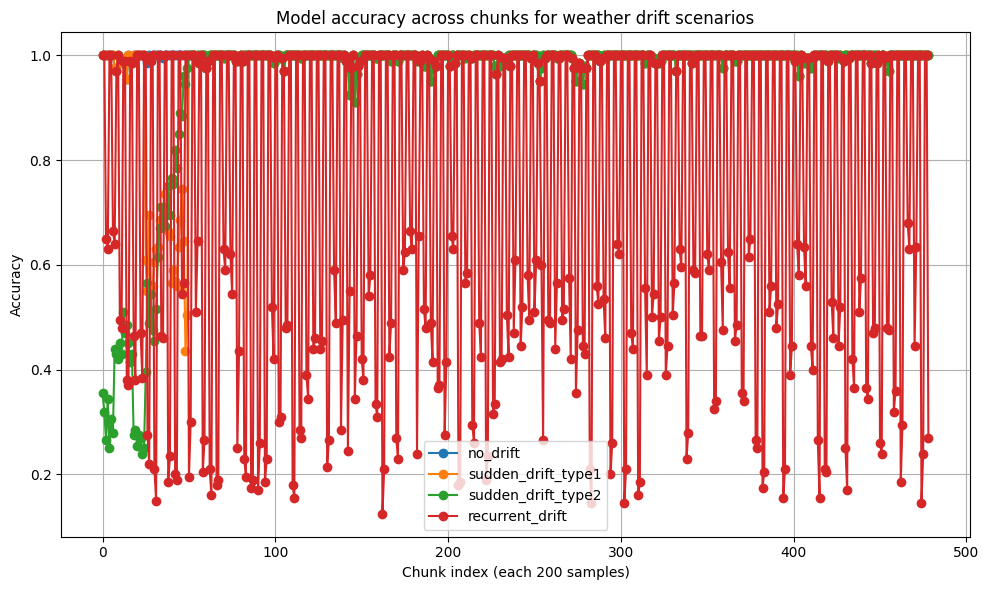

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# ===================================================
# assume these weather drift dataframes already exist:
# df_nodrift, df_sudden_type1, df_sudden_type2, df_recurrent
# ===================================================
datasets = {
    "no_drift": df_nodrift,
    "sudden_drift_type1": df_sudden_type1,
    "sudden_drift_type2": df_sudden_type2,
    "recurrent_drift": df_recurrent,
}

# ===================================================
# define features and target
# ===================================================
features = [
    "Temperature (C)", "Apparent Temperature (C)", "Humidity",
    "Wind Speed (km/h)", "Wind Bearing (degrees)",
    "Visibility (km)", "Cloud Cover", "Pressure (millibars)"
]
target = "Rain"

chunk_size = 200

# ===================================================
# load main weather dataset and train model
# ===================================================
# note: df is your main base dataset (e.g., df_nodrift)
X = df[features].values
y = df[target].values

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

# split
X_train, X_test, y_train, y_test = train_test_split(
    X_train_scaled, y, test_size=0.3, random_state=42
)

# model (same architecture)
model = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu',
                      solver='adam', max_iter=300, random_state=42)
model.fit(X_train, y_train)

# ===================================================
# Evaluate trained model on each drift dataset
# ===================================================
plt.figure(figsize=(10, 6))

for name, df_mod in datasets.items():
    X_mod = df_mod[features].values
    y_mod = df_mod[target].values

    # scale using same scaler from training
    X_mod_scaled = scaler.transform(X_mod)

    # predict
    y_pred = model.predict(X_mod_scaled)

    # chunk-wise accuracy
    n_samples = len(X_mod_scaled)
    n_chunks = n_samples // chunk_size
    accs = []

    for i in range(n_chunks):
        start, end = i * chunk_size, (i + 1) * chunk_size
        y_true_chunk = y_mod[start:end]
        y_pred_chunk = y_pred[start:end]
        if len(y_true_chunk) == 0:
            continue
        accs.append(accuracy_score(y_true_chunk, y_pred_chunk))

    plt.plot(range(len(accs)), accs, marker='o', label=name)

# ===================================================
# Plot results
# ===================================================
plt.title("Model accuracy across chunks for weather drift scenarios")
plt.xlabel(f"Chunk index (each {chunk_size} samples)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
# === Load your dataset (e.g., weatherHistory 2.csv) ===
df = df_sudden_type1
# === Clean column names ===
df.columns = [col.strip().replace('Loud', 'Cloud') for col in df.columns]
# === Drop missing values ===
df = df.dropna()
# === Split features and target ===
features = [
    "Temperature (C)", "Apparent Temperature (C)", "Humidity",
    "Wind Speed (km/h)", "Wind Bearing (degrees)",
    "Visibility (km)", "Cloud Cover", "Pressure (millibars)"
]
target = "Rain"
X = df[features]
y = df[target]
# === Encode labels (kept for consistency) ===
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# === Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)
# === Step 5: Feature Scaling ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# === Step 6: Build ANN Model (YOUR MODEL) ===
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input + 1st hidden layer
    Dropout(0.3),  # Prevent overfitting
    Dense(32, activation='relu'),  # 2nd hidden layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer (binary)
])
# === Step 7: Compile Model ===
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
# === Train Model ===
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)
# === Predict ===
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()
# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
# === Combine features + true label + predicted label ===
df_results = pd.DataFrame(X_test, columns=features)
df_results["true_class"] = le.inverse_transform(y_test)
df_results["predicted_class"] = le.inverse_transform(y_pred)
# === Save results ===
df_results.to_csv("weather_ann_predictions.csv", index=False)
print("\nPredictions saved to: weather_ann_predictions.csv")
# === Preview ===
print("\nSample predictions:")
print(df_results.head())

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1679/1679 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9258 - loss: 0.2222 - val_accuracy: 0.9834 - val_loss: 0.0599
Epoch 2/5
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9793 - loss: 0.0644 - val_accuracy: 0.9833 - val_loss: 0.0439
Epoch 3/5
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9821 - loss: 0.0543 - val_accuracy: 0.9885 - val_loss: 0.0346
Epoch 4/5
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9857 - loss: 0.0424 - val_accuracy: 0.9897 - val_loss: 0.0288
Epoch 5/5
1679/1679 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9869 - loss: 0.0383 - val_accuracy: 0.9902 - val_loss: 0.0277
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Confusion Matrix:
[[ 4468   113]
 [  175 24025]]

Predictions saved to: weather_ann_predictions.csv

Sample predictions:
   Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0         0.724778                  0.725133 -0.188851          -0.379355   
1        -5.538658                 -4.117495 -7.

Surrogate accuracy vs. black-box predictions: 0.9956


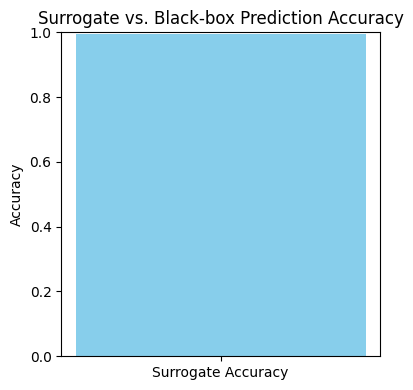

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
# =======================================================
# === SURROGATE MODEL (Decision Tree for explainability)
# =======================================================
X_surrogate = df_results[features].values
# Use numeric labels (since DecisionTreeClassifier requires numeric targets)
y_surrogate = LabelEncoder().fit_transform(df_results["predicted_class"])
# Train surrogate (simple interpretable model)
surrogate_model = DecisionTreeClassifier(max_depth=4, random_state=42)
surrogate_model.fit(X_surrogate, y_surrogate)
# Evaluate surrogate fidelity
y_surrogate_pred = surrogate_model.predict(X_surrogate)
acc = accuracy_score(y_surrogate, y_surrogate_pred)
print(f"Surrogate accuracy vs. black-box predictions: {acc:.4f}")
# =======================================================
# === PLOT 1: Surrogate fidelity bar
# =======================================================
plt.figure(figsize=(4, 4))
plt.bar(['Surrogate Accuracy'], [acc], color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Surrogate vs. Black-box Prediction Accuracy')
plt.tight_layout()
plt.show()

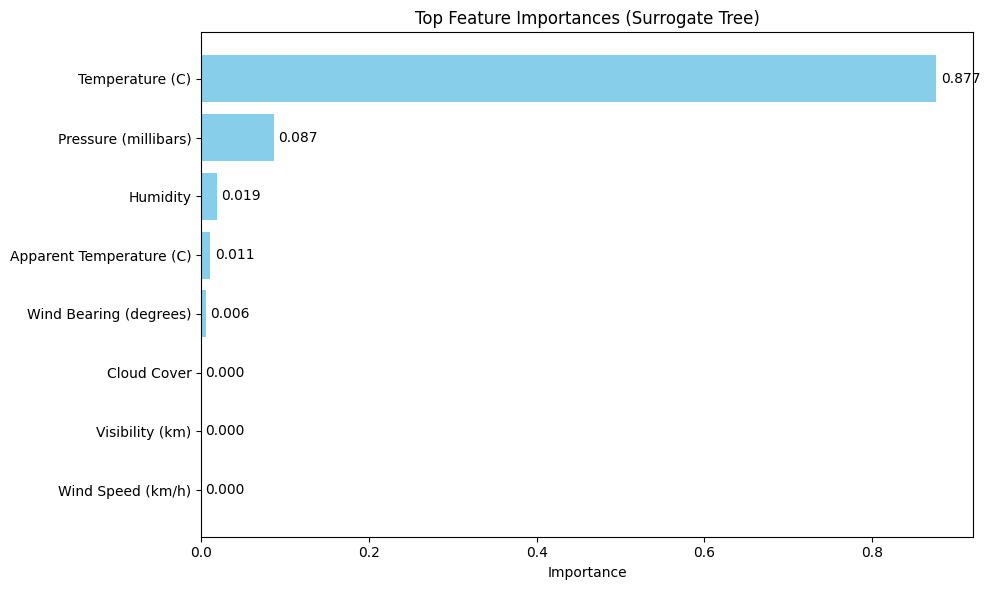

In [ ]:
# =======================================================
# === PLOT 2: Top Feature Importances from surrogate
# =======================================================
importances = surrogate_model.feature_importances_
indices = np.argsort(importances)[::-1]  # sort descending
top_n = min(10, len(features))
top_indices = indices[:top_n]
top_features = [features[i] for i in top_indices]
top_importances = importances[top_indices]

plt.figure(figsize=(10, 6))
bars = plt.barh(range(top_n), top_importances[::-1], color='skyblue')
plt.yticks(range(top_n), top_features[::-1])
plt.xlabel('Importance')
plt.title('Top Feature Importances (Surrogate Tree)')

# Add numerical values to bars
for i, b in enumerate(bars):
    width = b.get_width()
    plt.text(width + 0.005, b.get_y() + b.get_height()/2,
             f"{top_importances[::-1][i]:.3f}", va='center')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
# === Get feature importances from the trained surrogate model ===
importances = surrogate_model.feature_importances_
# === Build DataFrame of all features with their importances ===
df_baseline_importance = pd.DataFrame({
    'feature': features,
    'importance': importances
})
# === Sort in descending order ===
df_baseline_importance = df_baseline_importance.sort_values(
    by='importance', ascending=False
).reset_index(drop=True)
# === Select top 10 features ===
df_baseline_top10 = df_baseline_importance.head(10)
# === Display top 10 ===
print(df_baseline_top10)

                    feature  importance
0           Temperature (C)    0.877119
1      Pressure (millibars)    0.087058
2                  Humidity    0.019113
3  Apparent Temperature (C)    0.010890
4    Wind Bearing (degrees)    0.005821
5         Wind Speed (km/h)    0.000000
6           Visibility (km)    0.000000
7               Cloud Cover    0.000000


**Base Statistics**
---

In [ ]:
import pandas as pd
# --- Configuration ---
block_size = 50  # Number of samples per block
selected_cols = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Cloud Cover', 'Pressure (millibars)']
# Make a copy of the weather dataset
df_tmp = df.copy()
df_tmp['block'] = df_tmp.index // block_size  # Assign block index
# Check if all columns exist
cols_to_use = [c for c in selected_cols if c in df_tmp.columns]
if len(cols_to_use) < len(selected_cols):
    print("Warning: some selected columns missing and skipped")
# Compute mean, variance, and standard deviation per block
df_baseline_stats = (
    df_tmp
    .groupby('block')[cols_to_use]
    .agg(['mean', 'var', 'std'])
)
# Flatten MultiIndex column names (e.g., nswprice_mean, vicprice_var, etc.)
df_baseline_stats.columns = [
    f"{col}_{stat}" for col, stat in df_baseline_stats.columns
]
# Reset index so 'block' becomes a column
df_baseline_stats = df_baseline_stats.reset_index()
# Save to CSV
df_baseline_stats.to_csv("weather_baseline_stats.csv", index=False)
# Display the resulting DataFrame
df_baseline_stats

,block,Temperature (C)_mean,Temperature (C)_var,Temperature (C)_std,Apparent Temperature (C)_mean,Apparent Temperature (C)_var,Apparent Temperature (C)_std,Humidity_mean,Humidity_var,Humidity_std,...,Wind Bearing (degrees)_std,Visibility (km)_mean,Visibility (km)_var,Visibility (km)_std,Cloud Cover_mean,Cloud Cover_var,Cloud Cover_std,Pressure (millibars)_mean,Pressure (millibars)_var,Pressure (millibars)_std
0,0,13.409111,19.433072,4.408296,12.819444,26.448526,5.142813,0.661400,0.027082,0.164565,...,54.224778,12.191886,7.197329,2.682784,0.0,0.0,0.0,1013.811000,11.033813,3.321718
1,1,9.960556,10.591076,3.254393,8.193889,21.598394,4.647407,0.824000,0.010343,0.101700,...,127.989566,9.639392,13.779371,3.712058,0.0,0.0,0.0,1005.291000,2.140793,1.463145
2,2,9.346667,11.452845,3.384205,8.251778,18.610129,4.313946,0.739800,0.015455,0.124318,...,85.997439,11.475436,7.744153,2.782832,0.0,0.0,0.0,1012.416000,6.677245,2.584037
3,3,13.542000,9.343882,3.056776,13.375444,11.288216,3.359794,0.696200,0.024081,0.155181,...,61.904564,12.140044,5.564921,2.359008,0.0,0.0,0.0,1014.858600,11.382078,3.373733
4,4,14.005444,12.724154,3.567093,13.962889,13.166073,3.628508,0.727600,0.019333,0.139043,...,138.708327,10.929002,10.283672,3.206817,0.0,0.0,0.0,1012.065200,1.059176,1.029163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,1914,16.232556,31.700011,5.630276,16.203778,32.169451,5.671812,0.642800,0.044029,0.209830,...,71.412467,15.108884,9.492357,3.080967,0.0,0.0,0.0,1025.368000,11.675363,3.416923
1915,1915,19.127778,36.499531,6.041484,18.934111,34.867483,5.904869,0.643400,0.049292,0.222019,...,108.202133,14.856436,7.071308,2.659193,0.0,0.0,0.0,1018.788000,1.689841,1.299939
1916,1916,19.013556,29.701785,5.449934,18.856444,26.523082,5.150056,0.760200,0.052745,0.229662,...,77.204832,13.480530,9.134743,3.022374,0.0,0.0,0.0,1014.151000,2.872332,1.694795
1917,1917,20.414889,15.109288,3.887067,20.406444,14.971730,3.869332,0.744200,0.030176,0.173712,...,98.779344,14.275870,5.338586,2.310538,0.0,0.0,0.0,1019.536200,2.808440,1.675840


**New Data Statictsics**
---

In [ ]:
import pandas as pd

# --- Configuration ---
block_size = 50  # samples per block
selected_cols = [
    'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
    'Wind Speed (km/h)', 'Wind Bearing (degrees)',
    'Visibility (km)', 'Cloud Cover', 'Pressure (millibars)'
]

# --- Combine all drift datasets into one ---
df_all = pd.concat(
    [df_sudden_type1, df_sudden_type2, df_recurrent],
    axis=0,
    ignore_index=True
)

# --- Assign block IDs ---
df_all['block'] = df_all.index // block_size

# --- Filter only available columns ---
cols_to_use = [c for c in selected_cols if c in df_all.columns]
if len(cols_to_use) < len(selected_cols):
    print("⚠️ Warning: some selected columns missing and skipped")

# --- Compute mean/variance/std for each block ---
df_all_stats = (
    df_all
    .groupby('block')[cols_to_use]
    .agg(['mean', 'var', 'std'])
)

# --- Flatten multi-level column names ---
df_all_stats.columns = [f"{col}_{stat}" for col, stat in df_all_stats.columns]

# --- Reset index so 'block' becomes a column ---
df_all_stats = df_all_stats.reset_index()

# --- Save results ---
df_all_stats.to_csv("weather_all_drift_stats.csv", index=False)
print("✅ Combined drift statistics saved to weather_all_drift_stats.csv")

# --- Display preview of computed statistics ---
df_all_stats.head()


✅ Combined drift statistics saved to weather_all_drift_stats.csv


,block,Temperature (C)_mean,Temperature (C)_var,Temperature (C)_std,Apparent Temperature (C)_mean,Apparent Temperature (C)_var,Apparent Temperature (C)_std,Humidity_mean,Humidity_var,Humidity_std,...,Wind Bearing (degrees)_std,Visibility (km)_mean,Visibility (km)_var,Visibility (km)_std,Cloud Cover_mean,Cloud Cover_var,Cloud Cover_std,Pressure (millibars)_mean,Pressure (millibars)_var,Pressure (millibars)_std
0,0,13.409111,19.433072,4.408296,12.819444,26.448526,5.142813,0.6614,0.027082,0.164565,...,54.224778,12.191886,7.197329,2.682784,0.0,0.0,0.0,1013.8110,11.033813,3.321718
1,1,9.960556,10.591076,3.254393,8.193889,21.598394,4.647407,0.8240,0.010343,0.101700,...,127.989566,9.639392,13.779371,3.712058,0.0,0.0,0.0,1005.2910,2.140793,1.463145
2,2,9.346667,11.452845,3.384205,8.251778,18.610129,4.313946,0.7398,0.015455,0.124318,...,85.997439,11.475436,7.744153,2.782832,0.0,0.0,0.0,1012.4160,6.677245,2.584037
3,3,13.542000,9.343882,3.056776,13.375444,11.288216,3.359794,0.6962,0.024081,0.155181,...,61.904564,12.140044,5.564921,2.359008,0.0,0.0,0.0,1014.8586,11.382078,3.373733
4,4,14.005444,12.724154,3.567093,13.962889,13.166073,3.628508,0.7276,0.019333,0.139043,...,138.708327,10.929002,10.283672,3.206817,0.0,0.0,0.0,1012.0652,1.059176,1.029163


In [ ]:
import pandas as pd
import numpy as np

# ============================================================
# Load pre-computed statistics for weather dataset
# ============================================================
df_baseline = pd.read_csv("weather_baseline_stats.csv")
df_drifted  = pd.read_csv("weather_all_drift_stats.csv")

# ============================================================
# Baseline reference vector: mean across all baseline blocks
# ============================================================
baseline_row = df_baseline.mean()

# ============================================================
# Collect all columns except 'block'
# ============================================================
cols = [c for c in df_baseline.columns if c != 'block']
base_features = sorted(set(col.rsplit('_', 1)[0] for col in cols))

records = []

# ============================================================
# Compute FDDS block-wise (correct formula)
# FDDS_j = (μb-μw)^2 + (vb+vw-2√(vb·vw))
# ============================================================
for idx, drift_row in df_drifted.iterrows():
    block_id = drift_row.get("block", idx)
    row_result = {"block": block_id}

    for base in base_features:
        mean_b = baseline_row.get(f"{base}_mean", np.nan)
        var_b  = baseline_row.get(f"{base}_var", np.nan)

        if pd.isna(var_b):
            std_b = baseline_row.get(f"{base}_std", np.nan)
            var_b = std_b**2 if not pd.isna(std_b) else np.nan

        mean_w = drift_row.get(f"{base}_mean", np.nan)
        var_w  = drift_row.get(f"{base}_var", np.nan)

        if pd.isna(var_w):
            std_w = drift_row.get(f"{base}_std", np.nan)
            var_w = std_w**2 if not pd.isna(std_w) else np.nan

        if pd.isna(mean_b) or pd.isna(mean_w) or pd.isna(var_b) or pd.isna(var_w):
            row_result[base] = np.nan
        else:
            d = (mean_b - mean_w)**2 + (var_b + var_w - 2*np.sqrt(var_b * var_w))
            row_result[base] = d

    records.append(row_result)

df_fdds_vector = pd.DataFrame(records)

df_fdds_vector.to_csv("weather_fdds_vector.csv", index=False)

print("✅ Weather FDDS vector saved.")
df_fdds_vector.head()


✅ Weather FDDS vector saved.


,block,Apparent Temperature (C),Cloud Cover,Humidity,Pressure (millibars),Temperature (C),Visibility (km),Wind Bearing (degrees),Wind Speed (km/h)
0,0.0,50.684993,0.0,0.012770,44689.854677,41.357124,11.380102,10478.679163,22.964606
1,1.0,42.953967,0.0,0.045222,45945.874250,46.201606,1.456390,1380.150144,31.609952
2,2.0,47.312779,0.0,0.023664,45067.647449,45.260616,7.836350,5016.571431,14.951173
3,3.0,79.846549,0.0,0.013636,44620.037316,59.255202,12.673492,9517.646435,23.645024
4,4.0,81.215973,0.0,0.018628,45743.243922,55.597125,4.525916,1253.718649,24.205362


In [ ]:
import pandas as pd

# ============================================================
# Load supporting data (already created previously)
# ============================================================
# df_fdds_vector     → per-feature FDDS values from Cell 1 (e.g., weather_fdds_vector)
# df_baseline_top10  → Top 10 surrogate feature importances (already loaded earlier)

# If needed to reload from files (optional):
# df_fdds_vector    = pd.read_csv("weather_fdds_vector.csv")
# df_baseline_top10 = pd.read_csv("weather_baseline_top10.csv")

# ============================================================
# Convert top-10 importance DataFrame into dictionary
# ============================================================
importance_dict = dict(zip(df_baseline_top10["feature"], df_baseline_top10["importance"]))

# Make a working copy of the FDDS vector
df_drift_exposure = df_fdds_vector.copy()

# ============================================================
# Compute MLS Drift Exposure Score (weighted FDDS) per block
# Same structure as your electricity code
# ============================================================
des_values = []

for idx, row in df_drift_exposure.iterrows():
    des_total = 0.0
    for feature_name, importance in importance_dict.items():
        # Match all feature columns corresponding to this base feature
        matching_cols = [c for c in df_drift_exposure.columns if c.startswith(feature_name)]
        for col in matching_cols:
            des_total += importance * row[col]
    des_values.append(des_total)

# Store the final weighted score (keep your naming exactly)
df_drift_exposure["FDDS"] = des_values

# ============================================================
# Save the results
# ============================================================
df_drift_exposure.to_csv("weather_drift_exposure_scores.csv", index=False)

print("✅ MLS Drift Exposure Scores computed and saved to weather_drift_exposure_scores.csv")
print(df_drift_exposure[["block", "FDDS"]].head())


✅ MLS Drift Exposure Scores computed and saved to weather_drift_exposure_scores.csv
   block         FDDS
0    0.0  3988.423942
1    1.0  4048.976215
2    2.0  3992.907843
3    3.0  3992.768239
4    4.0  4039.256874


In [ ]:
df_drift_exposure

,block,Apparent Temperature (C),Cloud Cover,Humidity,Pressure (millibars),Temperature (C),Visibility (km),Wind Bearing (degrees),Wind Speed (km/h),FDDS
0,0.0,50.684993,0.0,0.012770,44689.854677,41.357124,11.380102,10478.679163,22.964606,3988.423942
1,1.0,42.953967,0.0,0.045222,45945.874250,46.201606,1.456390,1380.150144,31.609952,4048.976215
2,2.0,47.312779,0.0,0.023664,45067.647449,45.260616,7.836350,5016.571431,14.951173,3992.907843
3,3.0,79.846549,0.0,0.013636,44620.037316,59.255202,12.673492,9517.646435,23.645024,3992.768239
4,4.0,81.215973,0.0,0.018628,45743.243922,55.597125,4.525916,1253.718649,24.205362,4039.256874
...,...,...,...,...,...,...,...,...,...,...
5752,5752.0,1545.351756,0.0,2.191478,36332.110865,2367.684416,217.843724,995617.525897,1266.065316,11051.790331
5753,5753.0,424.832266,0.0,2.876273,36803.304322,2071.717863,247.472462,637840.452674,936.630423,8738.514453
5754,5754.0,1304.088236,0.0,3.473450,36110.400380,2096.299989,178.182162,827061.034248,671.101492,9810.734065
5755,5755.0,1018.122416,0.0,2.268330,36253.493360,2469.323900,149.955301,600247.216888,1342.703029,8827.027423


In [ ]:
df_baseline_top10

,feature,importance
0,Temperature (C),0.877119
1,Pressure (millibars),0.087058
2,Humidity,0.019113
3,Apparent Temperature (C),0.010890
4,Wind Bearing (degrees),0.005821
5,Wind Speed (km/h),0.000000
6,Visibility (km),0.000000
7,Cloud Cover,0.000000


In [ ]:
df_drift_exposure.to_csv("df_fdds_Weather.csv")

In [ ]:
df_drift_exposure.to_csv("df_fdds_HAR.csv")

<Axes: >

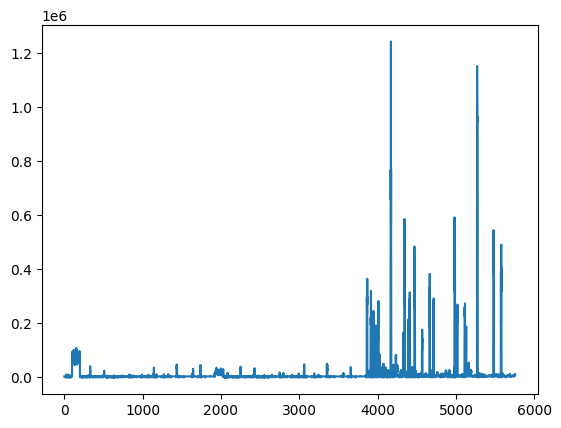

In [ ]:
df_drift_exposure["FDDS"].plot()

In [ ]:
import pandas as pd
import numpy as np

# ============================================================
# Load MLS Drift Exposure Scores (if not already in memory)
# ============================================================
# df_drift_exposure = pd.read_csv("electricity_drift_exposure_scores.csv")
# ============================================================
# Configuration
# ============================================================
block_group_size = 5    # Number of blocks per group
threshold_scaled = 0.01 # Scaled drift threshold (0–1 range)

# ============================================================
# Step 1: Assign group IDs (every 5 blocks form a group)
# ============================================================
df_drift_exposure["block_group"] = (df_drift_exposure["block"] // block_group_size).astype(int)

# ============================================================
# Step 2: Aggregate by group — compute average DES per block group
# ============================================================
group_results = []
for group_id, subset in df_drift_exposure.groupby("block_group"):
    avg_des = subset["FDDS"].mean()
    group_results.append({
        "block_range": f"{subset['block'].min():.0f}-{subset['block'].max():.0f}",
        "total_blocks": len(subset),
        "avg_FDDS": avg_des
    })

df_summary = pd.DataFrame(group_results)

# ============================================================
# Step 3: Scale avg_DES into [0, 1] range for comparison
# ============================================================
min_val = df_summary["avg_FDDS"].min()
max_val = df_summary["avg_FDDS"].max()
df_summary["avg_FDDS_scaled"] = (df_summary["avg_FDDS"] - min_val) / (max_val - min_val)

# ============================================================
# Step 4: Determine drift type based on scaled DES threshold
# ============================================================
df_summary["final_drift"] = np.where(
    df_summary["avg_FDDS_scaled"] > threshold_scaled,
    "REAL_DRIFT",
    "PSEUDO_DRIFT"
)

# ============================================================
# Save and display
# ============================================================
df_summary.to_csv("electricity_drift_summary.csv", index=False)

print("✅ Drift summary saved to electricity_drift_summary.csv")
print(df_summary)


✅ Drift summary saved to electricity_drift_summary.csv
     block_range  total_blocks     avg_FDDS  avg_FDDS_scaled   final_drift
0            0-4             5  4012.466622         0.003598  PSEUDO_DRIFT
1            5-9             5  4063.174525         0.003648  PSEUDO_DRIFT
2          10-14             5  4006.436254         0.003592  PSEUDO_DRIFT
3          15-19             5  2729.327723         0.002329  PSEUDO_DRIFT
4          20-24             5  5898.929889         0.005463  PSEUDO_DRIFT
...          ...           ...          ...              ...           ...
1147   5735-5739             5  7288.838358         0.006837  PSEUDO_DRIFT
1148   5740-5744             5  4717.729418         0.004295  PSEUDO_DRIFT
1149   5745-5749             5  4309.508833         0.003891  PSEUDO_DRIFT
1150   5750-5754             5  9296.390672         0.008822  PSEUDO_DRIFT
1151   5755-5756             2  9970.783214         0.009488  PSEUDO_DRIFT

[1152 rows x 5 columns]


<Axes: >

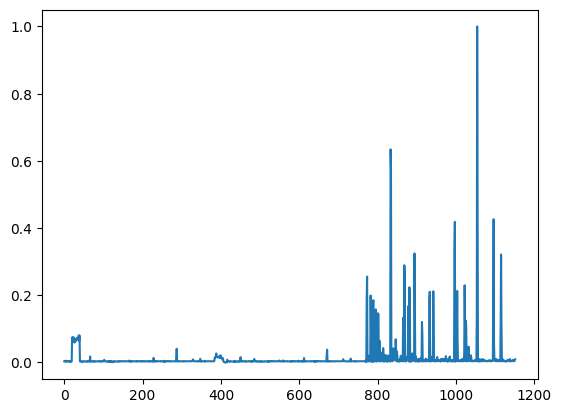

In [ ]:
df_summary['avg_FDDS_scaled'].plot()

In [ ]:
df_summary

,block_range,total_blocks,avg_FDDS,avg_FDDS_scaled,final_drift
0,0-4,5,4012.466622,0.003598,PSEUDO_DRIFT
1,5-9,5,4063.174525,0.003648,PSEUDO_DRIFT
2,10-14,5,4006.436254,0.003592,PSEUDO_DRIFT
3,15-19,5,2729.327723,0.002329,PSEUDO_DRIFT
4,20-24,5,5898.929889,0.005463,PSEUDO_DRIFT
...,...,...,...,...,...
1147,5735-5739,5,7288.838358,0.006837,PSEUDO_DRIFT
1148,5740-5744,5,4717.729418,0.004295,PSEUDO_DRIFT
1149,5745-5749,5,4309.508833,0.003891,PSEUDO_DRIFT
1150,5750-5754,5,9296.390672,0.008822,PSEUDO_DRIFT


In [ ]:
df_summary.to_csv("MDDP_5_weather.csv", index=False)

In [ ]:
df_summary.to_csv("df_fdds_weather.csv")

In [ ]:
df_summary['final_drift'].value_counts()

,count
final_drift,
PSEUDO_DRIFT,997
REAL_DRIFT,155


In [ ]:
df_all

,Unnamed: 0,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Rain,drift_type,block
0,0.000000,9.472222,7.388889,0.890000,14.119700,251.000000,15.826300,0.0,1015.130000,1,sudden_type1,0
1,1.000000,9.355556,7.227778,0.860000,14.264600,259.000000,15.826300,0.0,1015.630000,1,sudden_type1,0
2,2.000000,9.377778,9.377778,0.890000,3.928400,204.000000,14.956900,0.0,1015.940000,1,sudden_type1,0
3,3.000000,8.288889,5.944444,0.830000,14.103600,269.000000,15.826300,0.0,1016.410000,1,sudden_type1,0
4,4.000000,8.755556,6.977778,0.830000,11.044600,259.000000,15.826300,0.0,1016.510000,1,sudden_type1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
287803,96989.843603,71.054046,-11.993603,1.188583,-39.579661,995.843137,-10.659012,0.0,943.223923,0,recurrent,5756
287804,97134.897290,128.908824,4.067313,-0.541777,-0.508416,1203.624739,-2.834831,0.0,964.107924,0,recurrent,5756
287805,96414.990195,74.376323,-21.310109,2.489654,-30.233793,812.639806,9.637774,0.0,1005.043911,0,recurrent,5756
287806,97036.439084,63.250709,-28.784773,1.394917,-24.039963,692.365787,-13.418267,0.0,974.309255,0,recurrent,5756


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# ============================================================
# Configuration
# ============================================================
features = [
    'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
    'Wind Speed (km/h)', 'Wind Bearing (degrees)',
    'Visibility (km)', 'Cloud Cover', 'Pressure (millibars)'
]
target = "Rain"
block_window = 5  # evaluate every 5 consecutive blocks

# ============================================================
# Input DataFrame (combined drift dataset)
# ============================================================
df_tmp = df_all.copy()  # df_all is your combined drift dataset
df_tmp = df_tmp.sort_values(by="block").reset_index(drop=True)

# ============================================================
# Encode target labels
# ============================================================
le = LabelEncoder()
df_tmp[target] = le.fit_transform(df_tmp[target])  # Rain/No Rain → 1/0

# ============================================================
# Evaluate model performance per 5-block chunk
# ============================================================
accuracies = []
block_ids = sorted(df_tmp["block"].unique())

for i in range(0, len(block_ids), block_window):
    block_chunk = block_ids[i:i + block_window]
    df_chunk = df_tmp[df_tmp["block"].isin(block_chunk)]
    if df_chunk.empty:
        continue

    # Prepare feature and label arrays
    X_chunk = df_chunk[features].values
    y_chunk = df_chunk[target].values

    # Scale using the same fitted scaler used during training
    X_chunk_scaled = scaler.transform(pd.DataFrame(X_chunk, columns=features))

    # Predict with Keras model
    y_pred_prob = model.predict(X_chunk_scaled)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()

    # Compute accuracy manually
    accuracy = accuracy_score(y_chunk, y_pred)

    accuracies.append({
        "block_range": f"{block_chunk[0]}-{block_chunk[-1]}",
        "total_blocks": len(block_chunk),
        "accuracy": accuracy
    })

# ============================================================
# Build summary DataFrame
# ============================================================
df_accuracies = pd.DataFrame(accuracies)

# Save for later drift comparison (ground truth)
df_accuracies.to_csv("weather_blockwise_accuracies.csv", index=False)

print("✅ Block-wise accuracy ground truth saved to weather_blockwise_accuracies.csv")
print(df_accuracies.head())


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━

In [ ]:
df_accuracies

,block_range,total_blocks,accuracy
0,0-4,5,1.00000
1,5-9,5,1.00000
2,10-14,5,1.00000
3,15-19,5,1.00000
4,20-24,5,1.00000
...,...,...,...
1147,5735-5739,5,0.79600
1148,5740-5744,5,0.94400
1149,5745-5749,5,0.98400
1150,5750-5754,5,0.82400


In [ ]:
import numpy as np
# Assume df is your dataframe with 'accuracy'
df_accuracies["Ground truth"] = np.where(df_accuracies["accuracy"] > 0.90, "PSEUDO_DRIFT", "REAL_DRIFT")
df_accuracies

,block_range,total_blocks,accuracy,Ground truth
0,0-4,5,1.00000,PSEUDO_DRIFT
1,5-9,5,1.00000,PSEUDO_DRIFT
2,10-14,5,1.00000,PSEUDO_DRIFT
3,15-19,5,1.00000,PSEUDO_DRIFT
4,20-24,5,1.00000,PSEUDO_DRIFT
...,...,...,...,...
1147,5735-5739,5,0.79600,REAL_DRIFT
1148,5740-5744,5,0.94400,PSEUDO_DRIFT
1149,5745-5749,5,0.98400,PSEUDO_DRIFT
1150,5750-5754,5,0.82400,REAL_DRIFT


<Axes: >

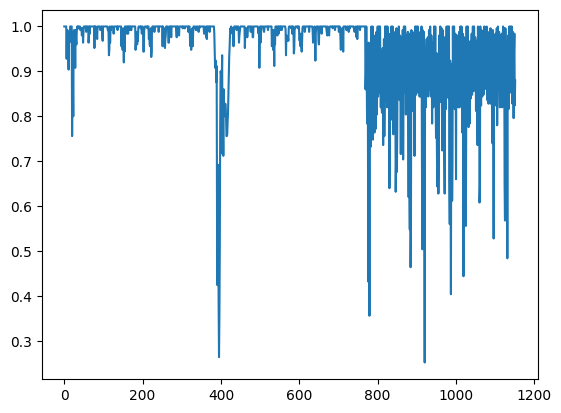

In [ ]:
df_accuracies["accuracy"].plot()

In [ ]:
df_accuracies.to_csv("Ground_5_weather.csv")

In [ ]:
df_accuracies['Ground truth'].value_counts()

,count
Ground truth,
PSEUDO_DRIFT,912
REAL_DRIFT,240


In [ ]:
df_summary["final_drift"].value_counts()

,count
final_drift,
PSEUDO_DRIFT,1073
REAL_DRIFT,79


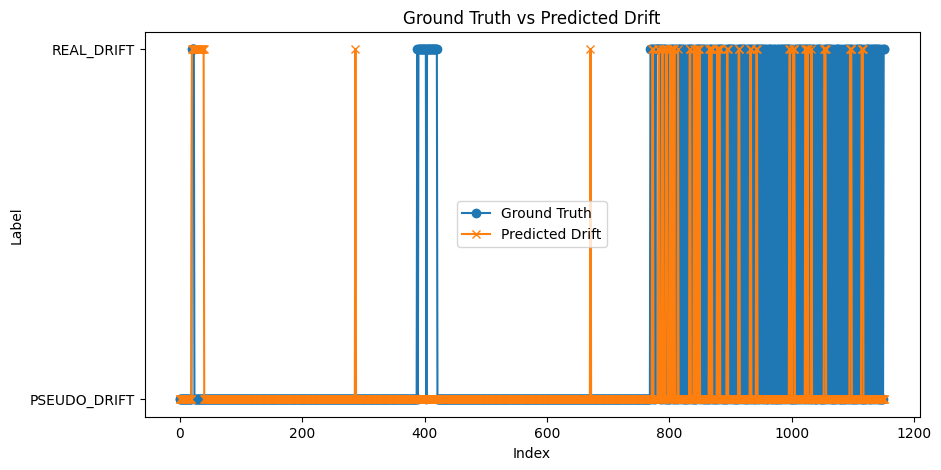

In [ ]:
import matplotlib.pyplot as plt
y_true = df_accuracies["Ground truth"][:]
y_pred = df_summary["final_drift"][:]
plt.figure(figsize=(10,5))
plt.plot(y_true.values, label="Ground Truth", marker='o')
plt.plot(y_pred.values, label="Predicted Drift", marker='x')
plt.xlabel("Index")
plt.ylabel("Label")
plt.title("Ground Truth vs Predicted Drift")
plt.legend()
plt.show()

Θ=0.7

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
# Example: assume your dataframe has columns 'actual' and 'predicted'
y_true = df_accuracies["Ground truth"][:]
y_pred = df_summary["final_drift"][:]
# Basic metrics
acc = accuracy_score(y_true, y_pred)
f1  = f1_score(y_true, y_pred, average="weighted")   # use 'macro' or 'micro' if needed
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Detailed report (per class precision, recall, f1)
report = classification_report(y_true, y_pred)
print("Accuracy:", acc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Accuracy: 0.8194444444444444
F1 Score: 0.7697558938605807
Precision: 0.8174358974358973
Recall: 0.8194444444444444
Confusion Matrix:
 [[902  10]
 [198  42]]
Classification Report:
               precision    recall  f1-score   support

PSEUDO_DRIFT       0.82      0.99      0.90       912
  REAL_DRIFT       0.81      0.17      0.29       240

    accuracy                           0.82      1152
   macro avg       0.81      0.58      0.59      1152
weighted avg       0.82      0.82      0.77      1152



Θ=0.5

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
# Example: assume your dataframe has columns 'actual' and 'predicted'
y_true = df_accuracies["Ground truth"][:]
y_pred = df_summary["final_drift"][:]
# Basic metrics
acc = accuracy_score(y_true, y_pred)
f1  = f1_score(y_true, y_pred, average="weighted")   # use 'macro' or 'micro' if needed
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Detailed report (per class precision, recall, f1)
report = classification_report(y_true, y_pred)
print("Accuracy:", acc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Accuracy: 0.8116319444444444
F1 Score: 0.7667167145941497
Precision: 0.7893109338102116
Recall: 0.8116319444444444
Confusion Matrix:
 [[890  22]
 [195  45]]
Classification Report:
               precision    recall  f1-score   support

PSEUDO_DRIFT       0.82      0.98      0.89       912
  REAL_DRIFT       0.67      0.19      0.29       240

    accuracy                           0.81      1152
   macro avg       0.75      0.58      0.59      1152
weighted avg       0.79      0.81      0.77      1152



**Θ=0.3**


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
# Example: assume your dataframe has columns 'actual' and 'predicted'
y_true = df_accuracies["Ground truth"][:]
y_pred = df_summary["final_drift"][:]
# Basic metrics
acc = accuracy_score(y_true, y_pred)
f1  = f1_score(y_true, y_pred, average="weighted")   # use 'macro' or 'micro' if needed
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Detailed report (per class precision, recall, f1)
report = classification_report(y_true, y_pred)
print("Accuracy:", acc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Accuracy: 0.8151041666666666
F1 Score: 0.7759437947616529
Precision: 0.7934647327379758
Recall: 0.8151041666666666
Confusion Matrix:
 [[886  26]
 [187  53]]
Classification Report:
               precision    recall  f1-score   support

PSEUDO_DRIFT       0.83      0.97      0.89       912
  REAL_DRIFT       0.67      0.22      0.33       240

    accuracy                           0.82      1152
   macro avg       0.75      0.60      0.61      1152
weighted avg       0.79      0.82      0.78      1152



**θ=0.1**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
# Example: assume your dataframe has columns 'actual' and 'predicted'
y_true = df_accuracies["Ground truth"][:]
y_pred = df_summary["final_drift"][:]
# Basic metrics
acc = accuracy_score(y_true, y_pred)
f1  = f1_score(y_true, y_pred, average="weighted")   # use 'macro' or 'micro' if needed
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Detailed report (per class precision, recall, f1)
report = classification_report(y_true, y_pred)
print("Accuracy:", acc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Accuracy: 0.8324652777777778
F1 Score: 0.8181692095846236
Precision: 0.8170465698169778
Recall: 0.8324652777777778
Confusion Matrix:
 [[858  54]
 [139 101]]
Classification Report:
               precision    recall  f1-score   support

PSEUDO_DRIFT       0.86      0.94      0.90       912
  REAL_DRIFT       0.65      0.42      0.51       240

    accuracy                           0.83      1152
   macro avg       0.76      0.68      0.71      1152
weighted avg       0.82      0.83      0.82      1152



In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
df_all.to_csv("/content/drive/My Drive/Early Drift Detection/Drifted_wed_data.csv", index=False)

Mounted at /content/drive


**ADWIN Weather**
---

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
# Define the paths to your datasets in Google Drive
import numpy as np
df_all=pd.read_csv("/content/drive/My Drive/Early Drift Detection/Drifted_wed_data.csv")
df_all

Mounted at /content/drive


,Unnamed: 0,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Rain,drift_type,block
0,0.000000,9.472222,7.388889,0.890000,14.119700,251.000000,15.826300,0.0,1015.130000,1,sudden_type1,0
1,1.000000,9.355556,7.227778,0.860000,14.264600,259.000000,15.826300,0.0,1015.630000,1,sudden_type1,0
2,2.000000,9.377778,9.377778,0.890000,3.928400,204.000000,14.956900,0.0,1015.940000,1,sudden_type1,0
3,3.000000,8.288889,5.944444,0.830000,14.103600,269.000000,15.826300,0.0,1016.410000,1,sudden_type1,0
4,4.000000,8.755556,6.977778,0.830000,11.044600,259.000000,15.826300,0.0,1016.510000,1,sudden_type1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
287803,96989.843603,71.054046,-11.993603,1.188583,-39.579661,995.843137,-10.659012,0.0,943.223923,0,recurrent,5756
287804,97134.897290,128.908824,4.067313,-0.541777,-0.508416,1203.624739,-2.834831,0.0,964.107924,0,recurrent,5756
287805,96414.990195,74.376323,-21.310109,2.489654,-30.233793,812.639806,9.637774,0.0,1005.043911,0,recurrent,5756
287806,97036.439084,63.250709,-28.784773,1.394917,-24.039963,692.365787,-13.418267,0.0,974.309255,0,recurrent,5756


In [ ]:
import numpy as np
import pandas as pd

# ==========================================================
# VARIANCE-AWARE ADWIN DRIFT DETECTOR
# ==========================================================
def adwin_detector_single_feature(data_stream, delta=0.002, min_window=10):
    """
    ADWIN for single feature — variance-aware.
    Returns drift scores (0–1) combining mean + variance shift effects.
    """
    window = []
    drift_scores = np.zeros(len(data_stream))

    for i, value in enumerate(data_stream):
        window.append(value)

        if len(window) < min_window:
            continue

        n = len(window)
        split_points = [int(0.3 * n), int(0.5 * n), int(0.7 * n)]
        max_drift_score = 0

        for split_point in split_points:
            if split_point < 5 or (n - split_point) < 5:
                continue

            w0 = np.array(window[:split_point])
            w1 = np.array(window[split_point:])

            n0, n1 = len(w0), len(w1)
            m = 1.0 / (1.0 / n0 + 1.0 / n1)

            mean0, mean1 = np.mean(w0), np.mean(w1)
            var0, var1 = np.var(w0), np.var(w1)

            pooled_var = ((n0 - 1) * var0 + (n1 - 1) * var1) / max((n0 + n1 - 2), 1)
            δ_prime = max(delta / n, 1e-12)
            log_term = np.log(2.0 / δ_prime)

            eps_var = np.sqrt((2.0 / m) * pooled_var * log_term) + (2.0 / (3.0 * m)) * log_term

            # components
            mean_diff = abs(mean0 - mean1)
            var_diff = abs(np.sqrt(var0 + 1e-12) - np.sqrt(var1 + 1e-12))

            drift_mag = np.sqrt(mean_diff**2 + var_diff**2)

            drift_score = min(1.0, drift_mag / (eps_var + 1e-8))
            max_drift_score = max(max_drift_score, drift_score)

            # adaptive window shrink
            if drift_score > 0.7:
                window = w1.tolist()
                break

        drift_scores[i] = max_drift_score

        # rolling window control
        if len(window) > 50:
            window = window[-25:]

    return drift_scores


def _minmax_scale_dict(value_dict):
    """Scale dict values to [0,1] with min–max; handle degenerate case."""
    vals = np.array(list(value_dict.values()), dtype=float)
    vmin, vmax = float(np.min(vals)), float(np.max(vals))
    denom = vmax - vmin
    if denom <= 1e-12:
        return {k: 0.0 for k in value_dict}  # all equal
    return {k: (v - vmin) / denom for k, v in value_dict.items()}


# ==================== BLOCKWISE COMBINATION (ADWIN ONLY) ====================
def combine_adwin_drift_scores_blockwise(
    df,
    adwin_scores_dict,
    adwin_threshold=0.6,
    block_size=5,
    use_scaled_threshold=True,
):
    """
    Combine ADWIN drift scores from all features using block averages.
    1) Compute raw block means of ADWIN scores (per block, across features)
    2) Min–max scale block means to [0,1]
    3) Classify each block using the SCALED mean vs adwin_threshold (if use_scaled_threshold=True)
    """
    df = df.copy()
    if "block" not in df.columns:
        raise KeyError("Input DataFrame must contain a 'block' column.")

    df["block_group"] = (df["block"] // block_size).astype(int)

    adwin_block_means = {}

    # First pass: compute raw block means
    for group_id, group_df in df.groupby("block_group"):
        idx = group_df.index
        # mean over features, each feature mean over indices in this block
        per_feature_means = [np.mean(adwin_scores_dict[col][idx]) for col in adwin_scores_dict]
        adwin_block_means[group_id] = float(np.mean(per_feature_means))

    # Second pass: scale raw means to [0,1]
    adwin_block_means_scaled = _minmax_scale_dict(adwin_block_means)

    # Choose which value to compare to threshold
    if use_scaled_threshold:
        label_source = adwin_block_means_scaled
        print("\n=== BLOCK-WISE ADWIN MEAN SCORES (scaled to [0,1]) ===")
    else:
        label_source = adwin_block_means
        print("\n=== BLOCK-WISE ADWIN MEAN SCORES (raw) ===")

    adwin_block_labels = {}
    for gid in sorted(adwin_block_means.keys()):
        raw_mean = adwin_block_means[gid]
        scaled_mean = adwin_block_means_scaled[gid]
        score_for_threshold = label_source[gid]

        label = "REAL_DRIFT" if score_for_threshold > adwin_threshold else "PSEUDO_DRIFT"
        adwin_block_labels[gid] = label

        print(
            f"Block {gid:3d}: Raw={raw_mean:.4f}  Scaled={scaled_mean:.4f}  "
            f"→ Using {'Scaled' if use_scaled_threshold else 'Raw'}={score_for_threshold:.4f}  → {label}"
        )

    # Map results to dataframe
    df["ADWIN_score_mean"] = df["block_group"].map(adwin_block_means)
    df["ADWIN_score_mean_scaled"] = df["block_group"].map(adwin_block_means_scaled)
    df["ADWIN_drift"] = df["block_group"].map(adwin_block_labels)

    return df


# ==================== MAIN FUNCTION ====================
def detect_adwin_drift_all_columns(
    df,
    feature_columns=None,
    adwin_threshold=0.6,
    block_size=5,
    use_scaled_threshold=True,
):
    """
    Detect ADWIN drift on all specified columns with block averaging.
    Block means are min–max scaled to [0,1] and the scaled scores are used for thresholding by default.
    """
    if feature_columns is None:
        exclude_cols = ['activity', 'drift_type', 'block']
        feature_columns = [
            col for col in df.columns
            if col not in exclude_cols and pd.api.types.is_numeric_dtype(df[col])
        ]

    print(f"Processing {len(feature_columns)} features: {feature_columns}")

    adwin_scores_dict = {}
    for col in feature_columns:
        print(f"Calculating ADWIN drift scores for {col}...")
        data = df[col].values
        adwin_scores_dict[col] = adwin_detector_single_feature(data)

    print("\nCombining ADWIN drift scores block-wise (with scaling)...")
    result_df = combine_adwin_drift_scores_blockwise(
        df.copy(),
        adwin_scores_dict,
        adwin_threshold=adwin_threshold,
        block_size=block_size,
        use_scaled_threshold=use_scaled_threshold,
    )

    adwin_real = (result_df['ADWIN_drift'] == 'REAL_DRIFT').sum()
    adwin_pseudo = (result_df['ADWIN_drift'] == 'PSEUDO_DRIFT').sum()

    print(f"\n=== ADWIN DRIFT DETECTION SUMMARY ===")
    print(f"REAL_DRIFT blocks: {adwin_real}")
    print(f"PSEUDO_DRIFT blocks: {adwin_pseudo}")
    print(f"Total blocks: {result_df['block_group'].nunique()}")

    return result_df


# ==================== SIMPLE USAGE ====================
def run_adwin_drift_detection(
    df_all,
    adwin_threshold=0.20,
    block_size=5,
    use_scaled_threshold=True,
):
    return detect_adwin_drift_all_columns(
        df_all,
        adwin_threshold=adwin_threshold,
        block_size=block_size,
        use_scaled_threshold=use_scaled_threshold,
    )

In [ ]:
df_all.columns

Index(['Unnamed: 0', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Cloud Cover', 'Pressure (millibars)', 'Rain', 'drift_type', 'block'],
      dtype='object')

In [ ]:
# ==================== RUN ADWIN DRIFT DETECTION ====================
result = detect_adwin_drift_all_columns(
    df_all,
    feature_columns=[
        'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
        'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
        'Cloud Cover', 'Pressure (millibars)'
    ],
    adwin_threshold=0.5,  # threshold applied on scaled mean by default
    block_size=5,
    use_scaled_threshold=True  # ensures scaled values are used
)

# ==================== ANALYZE RESULTS ====================
print("\n--- Drift Counts ---")
print(result['ADWIN_drift'].value_counts())

# Inspect both raw and scaled block mean scores
print("\n--- Block Mean and Scaled Scores ---")
print(
    result[['block_group', 'ADWIN_score_mean', 'ADWIN_score_mean_scaled', 'ADWIN_drift']]
    .drop_duplicates()
    .head(20)
)

# ==================== SAVE RESULTS ====================
result.to_csv('adwin_drift_detection_results.csv', index=False)


Processing 8 features: ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Cloud Cover', 'Pressure (millibars)']
Calculating ADWIN drift scores for Temperature (C)...
Calculating ADWIN drift scores for Apparent Temperature (C)...
Calculating ADWIN drift scores for Humidity...
Calculating ADWIN drift scores for Wind Speed (km/h)...
Calculating ADWIN drift scores for Wind Bearing (degrees)...
Calculating ADWIN drift scores for Visibility (km)...
Calculating ADWIN drift scores for Cloud Cover...
Calculating ADWIN drift scores for Pressure (millibars)...

Combining ADWIN drift scores block-wise (with scaling)...

=== BLOCK-WISE ADWIN MEAN SCORES (scaled to [0,1]) ===
Block   0: Raw=0.2831  Scaled=0.4535  → Using Scaled=0.4535  → PSEUDO_DRIFT
Block   1: Raw=0.2768  Scaled=0.4025  → Using Scaled=0.4025  → PSEUDO_DRIFT
Block   2: Raw=0.2996  Scaled=0.5870  → Using Scaled=0.5870  → REAL_DRIFT
Block   3: Raw=0.2891  Scal

<Axes: >

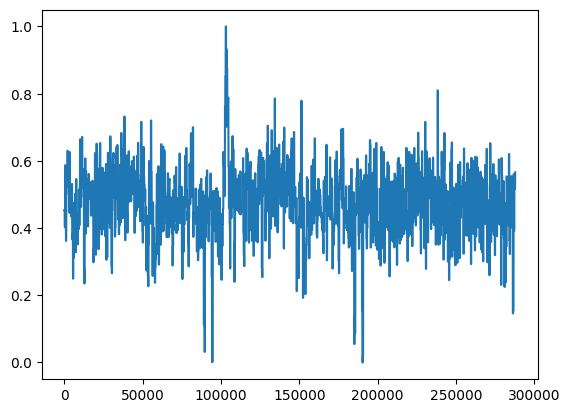

In [ ]:
result['ADWIN_score_mean_scaled'].plot()

In [ ]:
result['ADWIN_drift'].value_counts()

,count
ADWIN_drift,
PSEUDO_DRIFT,169500
REAL_DRIFT,118308


In [ ]:
def majority_drift(series):
    counts = series.value_counts()
    return counts.idxmax() if not counts.empty else "NO_DATA"
# Step 3: Aggregate per block_group
agg_results = result.groupby("block_group").agg({
    "ADWIN_drift": majority_drift
}).reset_index()
# Step 4: Add block range string
agg_results["block_range"] = agg_results["block_group"].apply(lambda g: f"{g*5}-{g*5+4}")
agg_results

,block_group,ADWIN_drift,block_range
0,0,PSEUDO_DRIFT,0-4
1,1,PSEUDO_DRIFT,5-9
2,2,REAL_DRIFT,10-14
3,3,REAL_DRIFT,15-19
4,4,PSEUDO_DRIFT,20-24
...,...,...,...
1147,1147,REAL_DRIFT,5735-5739
1148,1148,PSEUDO_DRIFT,5740-5744
1149,1149,REAL_DRIFT,5745-5749
1150,1150,REAL_DRIFT,5750-5754


In [ ]:
df_accuracies

,block_range,total_blocks,accuracy,Ground truth
0,0-4,5,1.00000,PSEUDO_DRIFT
1,5-9,5,1.00000,PSEUDO_DRIFT
2,10-14,5,1.00000,PSEUDO_DRIFT
3,15-19,5,1.00000,PSEUDO_DRIFT
4,20-24,5,1.00000,PSEUDO_DRIFT
...,...,...,...,...
1147,5735-5739,5,0.81600,REAL_DRIFT
1148,5740-5744,5,0.94400,PSEUDO_DRIFT
1149,5745-5749,5,0.98400,PSEUDO_DRIFT
1150,5750-5754,5,0.83200,REAL_DRIFT


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
# Example: assume your dataframe has columns 'actual' and 'predicted'
y_true = df_accuracies["Ground truth"][:]
y_pred = agg_results["ADWIN_drift"][:]
# Basic metrics
acc = accuracy_score(y_true, y_pred)
f1  = f1_score(y_true, y_pred, average="weighted")   # use 'macro' or 'micro' if needed
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Detailed report (per class precision, recall, f1)
report = classification_report(y_true, y_pred)
print("Accuracy:", acc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Accuracy: 0.5243055555555556
F1 Score: 0.5672515547099342
Precision: 0.6448259338087947
Recall: 0.5243055555555556
Confusion Matrix:
 [[521 391]
 [157  83]]
Classification Report:
               precision    recall  f1-score   support

PSEUDO_DRIFT       0.77      0.57      0.66       912
  REAL_DRIFT       0.18      0.35      0.23       240

    accuracy                           0.52      1152
   macro avg       0.47      0.46      0.44      1152
weighted avg       0.64      0.52      0.57      1152



In [ ]:
Thresholds=['0.1','0.3','0.5','0.7']
PMDD=['0.89','0.81','0.80','0.78']
ADWIN=[0.23,0.26,0.53,0.78]

***MMD DETECTOR WEATHER***
---

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# ==================== MMD DETECTOR (SINGLE FEATURE) ====================
def mmd_detector_single_feature(data_stream, window_size=20):
    """
    MMD for single feature - returns drift scores (0-1)
    """
    def rbf_kernel(x, y, sigma=1.0):
        x = np.array(x).reshape(-1, 1)
        y = np.array(y).reshape(-1, 1)
        dist_sq = np.sum(x**2, axis=1, keepdims=True) + np.sum(y**2, axis=1) - 2 * (x @ y.T)
        return np.exp(-dist_sq / (2 * sigma**2))

    reference = []
    current = []
    drift_scores = np.zeros(len(data_stream))

    for i, value in enumerate(data_stream):
        current.append(value)

        if len(current) > window_size:
            current = current[-window_size:]

        if len(reference) < window_size:
            reference.append(value)
            continue

        # Compute kernel matrices
        K_ref = rbf_kernel(reference, reference)
        K_curr = rbf_kernel(current, current)
        K_cross = rbf_kernel(reference, current)

        m, n = len(reference), len(current)

        mmd_sq = (np.sum(K_ref) - np.trace(K_ref)) / (m*(m-1)) + \
                 (np.sum(K_curr) - np.trace(K_curr)) / (n*(n-1)) - \
                 2 * np.mean(K_cross)

        mmd_sq = max(0, mmd_sq)
        drift_score = min(1.0, mmd_sq * 10)
        drift_scores[i] = drift_score

        # Update reference window when strong drift detected
        if drift_score > 0.8:
            reference = current.copy()

    return drift_scores


# ==================== COMBINE MMD DRIFT SCORES BLOCKWISE ====================
def combine_mmd_drift_scores_blockwise(df, mmd_scores_dict, mmd_threshold=0.7, block_size=5):
    """
    Combine MMD drift scores from all features using block averages (scaled 0–1).
    """
    df["block_group"] = (df["block"] // block_size).astype(int)
    mmd_block_means = []

    # Compute average drift score per block across all features
    for group_id, group_df in df.groupby("block_group"):
        idx = group_df.index
        mean_score = np.mean([np.mean(mmd_scores_dict[col][idx]) for col in mmd_scores_dict])
        mmd_block_means.append((group_id, mean_score))

    # Convert to DataFrame for scaling
    mmd_block_df = pd.DataFrame(mmd_block_means, columns=["block_group", "MMD_score_mean"])

    # --- Scale block means between 0 and 1 ---
    scaler = MinMaxScaler()
    mmd_block_df["MMD_score_mean_scaled"] = scaler.fit_transform(
        mmd_block_df[["MMD_score_mean"]]
    )

    # --- Classify scaled means ---
    mmd_block_df["MMD_drift"] = np.where(
        mmd_block_df["MMD_score_mean_scaled"] > mmd_threshold,
        "real_drift",
        "pseudo_drift"
    )

    # Merge results back into original DataFrame
    df = df.merge(mmd_block_df, on="block_group", how="left")

    return df


# ==================== MAIN FUNCTION ====================
def detect_mmd_drift_all_columns(df, feature_columns=None, mmd_threshold=0.7, block_size=5):
    """
    Detect drift on all numeric columns using MMD-based scoring.
    """
    if feature_columns is None:
        exclude_cols = ['activity', 'drift_type', 'block']
        feature_columns = [col for col in df.columns if col not in exclude_cols and
                          pd.api.types.is_numeric_dtype(df[col])]

    print(f"Processing {len(feature_columns)} features: {feature_columns}")

    mmd_scores_dict = {}

    for col in feature_columns:
        print(f"Calculating MMD drift scores for {col}...")
        data = df[col].values
        mmd_scores_dict[col] = mmd_detector_single_feature(data)

    print("Combining MMD drift scores block-wise...")
    result_df = combine_mmd_drift_scores_blockwise(df.copy(), mmd_scores_dict,
                                                   mmd_threshold, block_size)

    # Summary
    mmd_real = (result_df['MMD_drift'] == 'real_drift').sum()
    mmd_pseudo = (result_df['MMD_drift'] == 'pseudo_drift').sum()

    print("\n=== MMD DRIFT DETECTION SUMMARY ===")
    print(f"Real drifts: {mmd_real}")
    print(f"Pseudo drifts: {mmd_pseudo}")
    print(f"Total blocks: {result_df['block_group'].nunique()}")

    return result_df


# ==================== SIMPLE USAGE ====================
def run_mmd_drift_detection(df):
    return detect_mmd_drift_all_columns(df)


In [ ]:
# ==================== RUN MMD DRIFT DETECTION ====================
result = detect_mmd_drift_all_columns(
    df_all,
    feature_columns=[
        'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
        'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
        'Cloud Cover', 'Pressure (millibars)'
    ],
    mmd_threshold=0.50,  # threshold is applied on the *scaled* [0,1] means
    block_size=5
)
# ==================== ANALYZE RESULTS ====================
print("\n--- Drift Counts ---")
print(result['MMD_drift'].value_counts())

# Show one row per block with both raw and scaled means
block_summary = (
    result[['block_group', 'MMD_score_mean', 'MMD_score_mean_scaled', 'MMD_drift']]
    .drop_duplicates()
    .sort_values('block_group')
)
print("\n--- Block Means (raw & scaled) ---")
print(block_summary.head(20))

Processing 8 features: ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Cloud Cover', 'Pressure (millibars)']
Calculating MMD drift scores for Temperature (C)...
Calculating MMD drift scores for Apparent Temperature (C)...
Calculating MMD drift scores for Humidity...
Calculating MMD drift scores for Wind Speed (km/h)...
Calculating MMD drift scores for Wind Bearing (degrees)...
Calculating MMD drift scores for Visibility (km)...
Calculating MMD drift scores for Cloud Cover...
Calculating MMD drift scores for Pressure (millibars)...
Combining MMD drift scores block-wise...

=== MMD DRIFT DETECTION SUMMARY ===
Real drifts: 37750
Pseudo drifts: 250058
Total blocks: 1152

--- Drift Counts ---
MMD_drift
pseudo_drift    250058
real_drift       37750
Name: count, dtype: int64

--- Block Means (raw & scaled) ---
      block_group  MMD_score_mean  MMD_score_mean_scaled     MMD_drift
0               0        0.162774  

<Axes: >

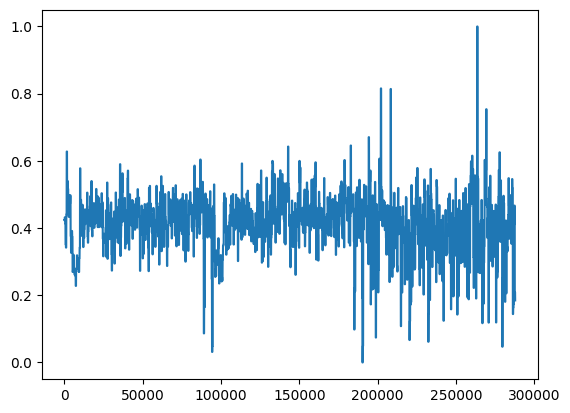

In [ ]:
result['MMD_score_mean_scaled'].plot()

In [ ]:
result['MMD_drift'].value_counts()

,count
MMD_drift,
pseudo_drift,250058
real_drift,37750


In [ ]:
result

,Unnamed: 0,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Rain,drift_type,block,block_group,MMD_score_mean,MMD_score_mean_scaled,MMD_drift
0,0.000000,9.472222,7.388889,0.890000,14.119700,251.000000,15.826300,0.0,1015.130000,1,sudden_type1,0,0,0.162774,0.423948,pseudo_drift
1,1.000000,9.355556,7.227778,0.860000,14.264600,259.000000,15.826300,0.0,1015.630000,1,sudden_type1,0,0,0.162774,0.423948,pseudo_drift
2,2.000000,9.377778,9.377778,0.890000,3.928400,204.000000,14.956900,0.0,1015.940000,1,sudden_type1,0,0,0.162774,0.423948,pseudo_drift
3,3.000000,8.288889,5.944444,0.830000,14.103600,269.000000,15.826300,0.0,1016.410000,1,sudden_type1,0,0,0.162774,0.423948,pseudo_drift
4,4.000000,8.755556,6.977778,0.830000,11.044600,259.000000,15.826300,0.0,1016.510000,1,sudden_type1,0,0,0.162774,0.423948,pseudo_drift
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287803,96989.843603,71.054046,-11.993603,1.188583,-39.579661,995.843137,-10.659012,0.0,943.223923,0,recurrent,5756,1151,0.100235,0.184657,pseudo_drift
287804,97134.897290,128.908824,4.067313,-0.541777,-0.508416,1203.624739,-2.834831,0.0,964.107924,0,recurrent,5756,1151,0.100235,0.184657,pseudo_drift
287805,96414.990195,74.376323,-21.310109,2.489654,-30.233793,812.639806,9.637774,0.0,1005.043911,0,recurrent,5756,1151,0.100235,0.184657,pseudo_drift
287806,97036.439084,63.250709,-28.784773,1.394917,-24.039963,692.365787,-13.418267,0.0,974.309255,0,recurrent,5756,1151,0.100235,0.184657,pseudo_drift


In [ ]:
def majority_drift(series):
    counts = series.value_counts()
    return counts.idxmax() if not counts.empty else "NO_DATA"
# Step 3: Aggregate per block_group
agg_results = result.groupby("block_group").agg({
    "MMD_drift": majority_drift
}).reset_index()
agg_results["block_range"] = agg_results["block_group"].apply(lambda g: f"{g*5}-{g*5+4}")
agg_results

,block_group,MMD_drift,block_range
0,0,pseudo_drift,0-4
1,1,pseudo_drift,5-9
2,2,pseudo_drift,10-14
3,3,pseudo_drift,15-19
4,4,pseudo_drift,20-24
...,...,...,...
1147,1147,pseudo_drift,5735-5739
1148,1148,pseudo_drift,5740-5744
1149,1149,pseudo_drift,5745-5749
1150,1150,pseudo_drift,5750-5754


In [ ]:
agg_results["MMD_drift"] = agg_results["MMD_drift"].replace("pseudo_drift", "PSEUDO_DRIFT")
agg_results["MMD_drift"] = agg_results["MMD_drift"].replace("real_drift", "REAL_DRIFT")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
# Example: assume your dataframe has columns 'actual' and 'predicted'
y_true = df_accuracies["Ground truth"][:]
y_pred = agg_results["MMD_drift"][:]
# Basic metrics
acc = accuracy_score(y_true, y_pred)
f1  = f1_score(y_true, y_pred, average="weighted")   # use 'macro' or 'micro' if needed
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Detailed report (per class precision, recall, f1)
report = classification_report(y_true, y_pred)
print("Accuracy:", acc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Accuracy: 0.7230902777777778
F1 Score: 0.6980164210505675
Precision: 0.6799968795001907
Recall: 0.7230902777777778
Confusion Matrix:
 [[797 115]
 [204  36]]
Classification Report:
               precision    recall  f1-score   support

PSEUDO_DRIFT       0.80      0.87      0.83       912
  REAL_DRIFT       0.24      0.15      0.18       240

    accuracy                           0.72      1152
   macro avg       0.52      0.51      0.51      1152
weighted avg       0.68      0.72      0.70      1152



**D3**
---

In [ ]:
df_all

,Unnamed: 0,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Rain,drift_type,block
0,0.000000,9.472222,7.388889,0.890000,14.119700,251.000000,15.826300,0.0,1015.130000,1,sudden_type1,0
1,1.000000,9.355556,7.227778,0.860000,14.264600,259.000000,15.826300,0.0,1015.630000,1,sudden_type1,0
2,2.000000,9.377778,9.377778,0.890000,3.928400,204.000000,14.956900,0.0,1015.940000,1,sudden_type1,0
3,3.000000,8.288889,5.944444,0.830000,14.103600,269.000000,15.826300,0.0,1016.410000,1,sudden_type1,0
4,4.000000,8.755556,6.977778,0.830000,11.044600,259.000000,15.826300,0.0,1016.510000,1,sudden_type1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
287803,96989.843603,71.054046,-11.993603,1.188583,-39.579661,995.843137,-10.659012,0.0,943.223923,0,recurrent,5756
287804,97134.897290,128.908824,4.067313,-0.541777,-0.508416,1203.624739,-2.834831,0.0,964.107924,0,recurrent,5756
287805,96414.990195,74.376323,-21.310109,2.489654,-30.233793,812.639806,9.637774,0.0,1005.043911,0,recurrent,5756
287806,97036.439084,63.250709,-28.784773,1.394917,-24.039963,692.365787,-13.418267,0.0,974.309255,0,recurrent,5756


In [ ]:
import numpy as np
import pandas as pd

def make_blockgroup_features(df, feature_columns, block_size=5):
    df = df.copy()
    df["block_group"] = (df["block"] // block_size).astype(int)

    # One vector per block_group (mean per sensor axis)
    X_bg = (
        df.groupby("block_group")[feature_columns]
          .mean()
          .reset_index()
          .sort_values("block_group")
          .reset_index(drop=True)
    )
    return X_bg  # columns: block_group + 6 sensor means


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

def d3_detector_multifeature(X_stream, w=20, rho=0.2, tau=0.7):
    """
    X_stream: numpy array shape (T, d)
    returns:
      drift_flags: array length T (True/False)
      auc_scores:  array length T (float)
    """
    T = X_stream.shape[0]
    new_size = max(2, int(w * rho))     # must be >=2 for stable AUC
    old_size = w

    drift_flags = np.zeros(T, dtype=bool)
    auc_scores  = np.zeros(T, dtype=float)

    # rolling reference index update (matches D3 idea: when drift -> advance faster)
    start = 0
    while True:
        end = start + old_size + new_size
        if end > T:
            break

        old = X_stream[start : start + old_size]
        new = X_stream[start + old_size : end]

        X = np.vstack([old, new])
        s = np.hstack([np.zeros(old.shape[0]), np.ones(new.shape[0])])

        # scale inside the window (important for HAR axes)
        scaler = StandardScaler()
        Xs = scaler.fit_transform(X)

        clf = LogisticRegression(max_iter=200, solver="lbfgs")
        clf.fit(Xs, s)

        # AUC on the same window (baseline style; you can add CV later if you want)
        probs = clf.predict_proba(Xs)[:, 1]
        auc = roc_auc_score(s, probs)

        # write score at the last index of the new window (decision time)
        decision_t = end - 1
        auc_scores[decision_t] = auc
        drift_flags[decision_t] = (auc >= tau)

        # D3-style window shift: if drift, drop w; else drop w*rho
        if drift_flags[decision_t]:
            start = start + old_size
        else:
            start = start + new_size

    return drift_flags, auc_scores


In [ ]:
def run_d3_baseline(df_all, feature_columns, block_size=5, w=20, rho=0.2, tau=0.7):
    # Step A: build block_group feature stream
    X_bg = make_blockgroup_features(df_all, feature_columns, block_size=block_size)
    X_stream = X_bg[feature_columns].values
    drift_flags, auc_scores = d3_detector_multifeature(X_stream, w=w, rho=rho, tau=tau)
    # Step B: convert to your labels at block_group level
    pred = np.where(drift_flags, "REAL_DRIFT", "PSEUDO_DRIFT")
    agg_results = pd.DataFrame({
        "block_group": X_bg["block_group"].values,
        "D3_AUC": auc_scores,
        "D3_drift": pred
    })
    # Optional: create block_range like you did
    agg_results["block_range"] = agg_results["block_group"].apply(
        lambda g: f"{g*block_size}-{g*block_size+(block_size-1)}"
    )
    return agg_results

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

#df_accuracies = pd.read_csv("/content/Ground.csv")

y_true = df_accuracies["Ground truth"][:]

agg_results_d3 = run_d3_baseline(
    df_all,
    feature_columns=['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
        'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
        'Cloud Cover', 'Pressure (millibars)'],
    block_size=5,
    w=20, rho=0.2, tau=0.3
)

y_pred = agg_results_d3["D3_drift"].values

print("Accuracy:", accuracy_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred, average="weighted"))
print("Precision:", precision_score(y_true, y_pred, average="weighted"))
print("Recall:", recall_score(y_true, y_pred, average="weighted"))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred))


Accuracy: 0.7612847222222222
F1 Score: 0.6986242595360683
Precision: 0.6663081791236081
Recall: 0.7612847222222222
Confusion Matrix:
 [[866  46]
 [229  11]]
Classification Report:
               precision    recall  f1-score   support

PSEUDO_DRIFT       0.79      0.95      0.86       912
  REAL_DRIFT       0.19      0.05      0.07       240

    accuracy                           0.76      1152
   macro avg       0.49      0.50      0.47      1152
weighted avg       0.67      0.76      0.70      1152



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**STUDD**
---

**Teacher Student Model**

In [ ]:
# === Import Libraries ===
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# -----------------------------
# Use df_all as requested
# -----------------------------
df = df_all.copy()

# Fix any typos in column names
df.columns = [col.strip().replace('Loud', 'Cloud') for col in df.columns]

# Drop missing values
df = df.dropna().reset_index(drop=True)

# Ensure block exists (needed for blockwise aggregation later)
if "block" not in df.columns:
    df["block"] = np.arange(len(df))

# === Encode Target Variable ===
# Convert 'Precip Type' → 1 for rain, 0 for snow/others
#df['Rain'] = df['Precip Type'].apply(lambda x: 1 if str(x).lower() == 'rain' else 0)

# === Select Features ===
features = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
            'Wind Speed (km/h)', 'Wind Bearing (degrees)',
            'Visibility (km)', 'Cloud Cover', 'Pressure (millibars)']

X = df[features].astype(float).values
y = df['Rain'].astype(int).values

# === Split Dataset ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === Feature Scaling ===
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

# === Teacher ANN Model ===
teacher = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_sc.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

teacher.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

teacher.fit(
    X_train_sc, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# === Evaluate Teacher ===
yT_prob = teacher.predict(X_test_sc, verbose=0).flatten()
yT_hat  = (yT_prob > 0.5).astype(int)

print("\n✅ TEACHER Confusion Matrix:")
print(confusion_matrix(y_test, yT_hat))
print("\n✅ TEACHER Classification Report:")
print(classification_report(y_test, yT_hat))
print("✅ TEACHER Accuracy:", accuracy_score(y_test, yT_hat))


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5037/5037 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8923 - loss: 0.2866 - val_accuracy: 0.9487 - val_loss: 0.1348
Epoch 2/5
5037/5037 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9449 - loss: 0.1425 - val_accuracy: 0.9510 - val_loss: 0.1251
Epoch 3/5
5037/5037 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9475 - loss: 0.1332 - val_accuracy: 0.9482 - val_loss: 0.1285
Epoch 4/5
5037/5037 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9498 - loss: 0.1266 - val_accuracy: 0.9508 - val_loss: 0.1220
Epoch 5/5
5037/5037 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9483 - loss: 0.1280 - val_accuracy: 0.9519 - val_loss: 0.1199

✅ TEACHER Confusion Matrix:
[[21798   213]
 [ 3755 60577]]

✅ TEACHER Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     22011
           1       1.00      0.94      0.97     64332

    accuracy                           0.95     86343
   macro avg       0.92      0.97      0.94     

In [ ]:
from tensorflow.keras.losses import KLDivergence

# -----------------------------------
# Create teacher soft labels on FULL STREAM (scaled)
# -----------------------------------
X_all = df[features].astype(float).values
X_all_sc = scaler.transform(X_all)

teacher_probs_all = teacher.predict(X_all_sc, verbose=0).flatten()  # values in [0,1]

# Convert to 2-class prob vectors for KL: [P(0), P(1)]
T_soft = np.stack([1 - teacher_probs_all, teacher_probs_all], axis=1)

# -----------------------------------
# Student model (smaller)
# -----------------------------------
student = Sequential([
    Dense(32, activation='relu', input_shape=(X_all_sc.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(2, activation='softmax')  # outputs [P0, P1]
])

student.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=KLDivergence(),   # KL(Teacher || Student)
    metrics=['accuracy']   # not "real accuracy" here; it’s imitation progress
)

# Split for imitation training (NOT ground truth)
Xs_train, Xs_test, Ts_train, Ts_test = train_test_split(
    X_all_sc, T_soft, test_size=0.3, random_state=42
)

history_s = student.fit(
    Xs_train, Ts_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

print("✅ Student imitation KL on heldout:", student.evaluate(Xs_test, Ts_test, verbose=0)[0])


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5037/5037 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9233 - loss: 0.1645 - val_accuracy: 0.9954 - val_loss: 0.0072
Epoch 2/5
5037/5037 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9905 - loss: 0.0152 - val_accuracy: 0.9978 - val_loss: 0.0020
Epoch 3/5
5037/5037 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9935 - loss: 0.0082 - val_accuracy: 0.9970 - val_loss: 0.0021
Epoch 4/5
5037/5037 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9937 - loss: 0.0071 - val_accuracy: 0.9975 - val_loss: 0.0012
Epoch 5/5
5037/5037 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9945 - loss: 0.0059 - val_accuracy: 0.9946 - val_loss: 0.0035
✅ Student imitation KL on heldout: 0.00352395698428154


In [ ]:
from scipy.special import rel_entr

def per_sample_kl(p, q, eps=1e-12):
    p = np.clip(p, eps, 1.0)
    q = np.clip(q, eps, 1.0)
    return np.sum(rel_entr(p, q), axis=1)

# Teacher soft probs as vectors
T_probs = T_soft  # shape (N,2)

# Student probs on full stream
S_probs = student.predict(X_all_sc, verbose=0)  # shape (N,2)

# (A) Hard disagreement stream (0/1)
T_hat = np.argmax(T_probs, axis=1)
S_hat = np.argmax(S_probs, axis=1)
loss_stream_error = (T_hat != S_hat).astype(float)

# (B) Soft disagreement stream (KL)
loss_stream_kl = per_sample_kl(T_probs, S_probs)

print("Example error-loss values:", loss_stream_error[:10])
print("Example KL-loss values:", loss_stream_kl[:10])


Example error-loss values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Example KL-loss values: [1.2204418e-06 7.1085560e-07 2.2648062e-05 6.6203938e-07 1.4433681e-07
 1.3841600e-08 1.1390403e-06 1.1605516e-07 1.4116522e-06 5.7426878e-06]


In [ ]:
def blockwise_loss_labels(df_all, loss_stream, block_size=5, threshold=0.3):
    df_tmp = df_all.copy().reset_index(drop=True)
    df_tmp["loss_raw"] = loss_stream

    # Min-Max scale to [0, 1]
    loss_min = df_tmp["loss_raw"].min()
    loss_max = df_tmp["loss_raw"].max()
    if loss_max > loss_min:
        df_tmp["loss"] = (df_tmp["loss_raw"] - loss_min) / (loss_max - loss_min)
    else:
        df_tmp["loss"] = 0.0

    # Ensure block exists
    if "block" not in df_tmp.columns:
        df_tmp["block"] = np.arange(len(df_tmp))

    # block group
    df_tmp["block_group"] = (df_tmp["block"] // block_size).astype(int)

    # aggregate
    bg = (
        df_tmp.groupby("block_group")["loss"]
        .mean()
        .reset_index()
        .sort_values("block_group")
    )

    bg["STTUDD_drift"] = np.where(bg["loss"] > threshold, "REAL_DRIFT", "PSEUDO_DRIFT")
    bg["block_range"] = bg["block_group"].apply(
        lambda g: f"{g*block_size}-{g*block_size+(block_size-1)}"
    )

    return bg

agg_sttudd = blockwise_loss_labels(
    df_all=df,
    loss_stream=loss_stream_kl,  # or loss_stream_error
    block_size=5,
    threshold=0.0001
)

print(agg_sttudd.head(20))
print(agg_sttudd["STTUDD_drift"].value_counts())


    block_group      loss  STTUDD_drift block_range
0             0  0.000012  PSEUDO_DRIFT         0-4
1             1  0.000009  PSEUDO_DRIFT         5-9
2             2  0.000016  PSEUDO_DRIFT       10-14
3             3  0.000027  PSEUDO_DRIFT       15-19
4             4  0.000059  PSEUDO_DRIFT       20-24
5             5  0.000036  PSEUDO_DRIFT       25-29
6             6  0.019280    REAL_DRIFT       30-34
7             7  0.007002    REAL_DRIFT       35-39
8             8  0.003510    REAL_DRIFT       40-44
9             9  0.006000    REAL_DRIFT       45-49
10           10  0.001769    REAL_DRIFT       50-54
11           11  0.016298    REAL_DRIFT       55-59
12           12  0.007869    REAL_DRIFT       60-64
13           13  0.007301    REAL_DRIFT       65-69
14           14  0.002853    REAL_DRIFT       70-74
15           15  0.000045  PSEUDO_DRIFT       75-79
16           16  0.000055  PSEUDO_DRIFT       80-84
17           17  0.000692    REAL_DRIFT       85-89
18          

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

#df_accuracies = pd.read_csv("/content/Ground.csv")

y_true = df_accuracies["Ground truth"].values
y_pred = agg_sttudd["STTUDD_drift"].values

print("Accuracy:", accuracy_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred, average="weighted"))
print("Precision:", precision_score(y_true, y_pred, average="weighted"))
print("Recall:", recall_score(y_true, y_pred, average="weighted"))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred))


Accuracy: 0.5173611111111112
F1 Score: 0.5410571680287768
Precision: 0.8544807370184254
Recall: 0.5173611111111112
Confusion Matrix:
 [[356 556]
 [  0 240]]
Classification Report:
               precision    recall  f1-score   support

PSEUDO_DRIFT       1.00      0.39      0.56       912
  REAL_DRIFT       0.30      1.00      0.46       240

    accuracy                           0.52      1152
   macro avg       0.65      0.70      0.51      1152
weighted avg       0.85      0.52      0.54      1152



**SCSD**
---

In [ ]:
# ============================================================
# JANG22 SEQUENTIAL CALIBRATED C2ST (COVARIATE SHIFT DETECTOR)
# WEATHER VERSION: df_all (stream) + df_accuracies (ground truth)
# ============================================================

import numpy as np
import pandas as pd
from collections import deque
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import beta
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, classification_report
)

# ============================================================
# 1) CLOPPER–PEARSON CONFIDENCE INTERVAL
# ============================================================
def clopper_pearson_interval(successes, n, alpha=0.05):
    s = int(successes)

    if s == 0:
        lo = 0.0
    else:
        lo = beta.ppf(alpha / 2, s, n - s + 1)

    if s == n:
        hi = 1.0
    else:
        hi = beta.ppf(1 - alpha / 2, s + 1, n - s)

    return lo, hi


# ============================================================
# 2) SEQUENTIAL C2ST WITH CP CALIBRATION (FAST + FIXED)
# ============================================================
def sequential_c2st_cp(
    df_all,
    feature_columns,
    source_df=None,
    source_size=500,
    w=50,
    alpha=0.05,
    random_state=42,
    check_every=1,
    return_debug=True,
    verbose_every=50000
):
    rng = np.random.default_rng(random_state)

    df_stream = df_all.reset_index(drop=True).copy()

    # (Optional) Keep streaming order if you have a time column
    # df_stream = df_stream.sort_values("Formatted Date").reset_index(drop=True)

    if source_df is None:
        if source_size >= len(df_stream):
            raise ValueError("source_size must be smaller than len(df_all).")
        source_df = df_stream.iloc[:source_size].copy().reset_index(drop=True)
        target_df = df_stream.iloc[source_size:].copy().reset_index(drop=True)
    else:
        source_df = source_df.copy().reset_index(drop=True)
        target_df = df_stream.copy().reset_index(drop=True)

    X_source = source_df[feature_columns].to_numpy(dtype=np.float32)
    X_target = target_df[feature_columns].to_numpy(dtype=np.float32)

    scaler = StandardScaler()
    scaler.fit(X_source)

    X_source_sc = scaler.transform(X_source).astype(np.float32)
    X_target_sc = scaler.transform(X_target).astype(np.float32)

    clf = SGDClassifier(
        loss="log_loss",
        penalty="l2",
        alpha=1e-4,
        learning_rate="optimal",
        random_state=random_state
    )

    # init
    X_init = np.vstack([X_source_sc[:1], X_target_sc[:1]])
    y_init = np.array([0, 1], dtype=int)
    clf.partial_fit(X_init, y_init, classes=np.array([0, 1], dtype=int))

    correct_window = deque(maxlen=2 * w)

    T = X_target_sc.shape[0]
    cov_shift = np.zeros(T, dtype=np.int8)

    if return_debug:
        mu_hat_arr = np.full(T, np.nan, dtype=np.float32)
        lo_arr     = np.full(T, np.nan, dtype=np.float32)
        hi_arr     = np.full(T, np.nan, dtype=np.float32)

    for t in range(T):
        s_idx = rng.integers(0, X_source_sc.shape[0])
        x_s = X_source_sc[s_idx:s_idx+1]
        x_t = X_target_sc[t:t+1]

        yhat_s = int(clf.predict(x_s)[0])
        yhat_t = int(clf.predict(x_t)[0])

        z_s = 1 if yhat_s == 0 else 0
        z_t = 1 if yhat_t == 1 else 0

        correct_window.append(z_s)
        correct_window.append(z_t)

        if len(correct_window) == 2 * w and (t % check_every == 0):
            successes = int(np.sum(correct_window))
            n = 2 * w
            mu_hat = successes / n
            lo, hi = clopper_pearson_interval(successes, n, alpha=alpha)

            cov_shift[t] = 1 if not (lo <= 0.5 <= hi) else 0

            if return_debug:
                mu_hat_arr[t] = mu_hat
                lo_arr[t] = lo
                hi_arr[t] = hi

        clf.partial_fit(np.vstack([x_s, x_t]), np.array([0, 1], dtype=int))

        if verbose_every and ((t + 1) % verbose_every == 0):
            print(f"Processed {t+1}/{T} target steps...")

    out = pd.DataFrame({"t": np.arange(T), "cov_shift": cov_shift})

    if return_debug:
        out["mu_hat"] = mu_hat_arr
        out["cp_lo"] = lo_arr
        out["cp_hi"] = hi_arr

    return out


# ============================================================
# 3) EVALUATION (AUTO PRINT METRICS + CONFUSION MATRIX)
# ============================================================
def evaluate_shift_detection(pred_df, df_accuracies, gt_col="Ground truth", pred_col="cov_shift"):

    y_pred = pred_df[pred_col].values

    # ----- Ground truth -----
    y_true_raw = df_accuracies[gt_col].values

    # Map GT strings -> 0/1 if needed
    if y_true_raw.dtype == object:
        mapping = {
            "REAL_DRIFT": 1, "PSEUDO_DRIFT": 0,
            "real_drift": 1, "pseudo_drift": 0,
            "SHIFT": 1, "NO_SHIFT": 0,
            "DRIFT": 1, "NO_DRIFT": 0,
            "1": 1, "0": 0
        }
        y_true = np.array([mapping.get(str(v).strip(), v) for v in y_true_raw], dtype=int)
    else:
        y_true = y_true_raw.astype(int)

    # ----- Align length safely -----
    n = min(len(y_true), len(y_pred))
    y_true = y_true[:n]
    y_pred = y_pred[:n]

    # ----- Metrics -----
    acc = accuracy_score(y_true, y_pred)
    f1  = f1_score(y_true, y_pred, average="weighted")
    prec = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    rec  = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    cm   = confusion_matrix(y_true, y_pred)

    print("\n================= EVALUATION RESULTS =================")
    print("Accuracy :", acc)
    print("F1 Score :", f1)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("\nConfusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_true, y_pred, zero_division=0))
    print("======================================================\n")


# ============================================================
# 4) RUN (WEATHER)
# ============================================================

# --- Use df_all and do the same column cleaning you used ---
df_stream = df_all.copy()

# Fix any typos in column names (Cloud Cover)
df_stream.columns = [col.strip().replace('Loud', 'Cloud') for col in df_stream.columns]

# Drop missing values (important for SGDClassifier)
df_stream = df_stream.dropna().reset_index(drop=True)

# Weather feature columns (same ones you used for the Rain model)
feature_columns = [
    'Temperature (C)',
    'Apparent Temperature (C)',
    'Humidity',
    'Wind Speed (km/h)',
    'Wind Bearing (degrees)',
    'Visibility (km)',
    'Cloud Cover',
    'Pressure (millibars)'
]

# (Optional safety) ensure all selected features are numeric
df_stream[feature_columns] = df_stream[feature_columns].apply(pd.to_numeric, errors="coerce")
df_stream = df_stream.dropna(subset=feature_columns).reset_index(drop=True)

pred = sequential_c2st_cp(
    df_all=df_stream,
    feature_columns=feature_columns,
    source_size=500,
    w=50,
    alpha=0.05,      # <= 0.05 is the standard; change only if you intentionally want 0.3
    check_every=5,
    return_debug=True,
    verbose_every=20000
)

print(pred["cov_shift"].value_counts())
print(pred.head(10))

# ---- Load your ground truth and evaluate ----
evaluate_shift_detection(pred, df_accuracies, gt_col="Ground truth", pred_col="cov_shift")

# ---- Save predictions ----
pred.to_csv("jang22_covariate_shift_predictions_weather.csv", index=False)
print("✅ Saved: jang22_covariate_shift_predictions_weather.csv")


Processed 20000/287308 target steps...
Processed 40000/287308 target steps...
Processed 60000/287308 target steps...
Processed 80000/287308 target steps...
Processed 100000/287308 target steps...
Processed 120000/287308 target steps...
Processed 140000/287308 target steps...
Processed 160000/287308 target steps...
Processed 180000/287308 target steps...
Processed 200000/287308 target steps...
Processed 220000/287308 target steps...
Processed 240000/287308 target steps...
Processed 260000/287308 target steps...
Processed 280000/287308 target steps...
cov_shift
0    237492
1     49816
Name: count, dtype: int64
   t  cov_shift  mu_hat  cp_lo  cp_hi
0  0          0     NaN    NaN    NaN
1  1          0     NaN    NaN    NaN
2  2          0     NaN    NaN    NaN
3  3          0     NaN    NaN    NaN
4  4          0     NaN    NaN    NaN
5  5          0     NaN    NaN    NaN
6  6          0     NaN    NaN    NaN
7  7          0     NaN    NaN    NaN
8  8          0     NaN    NaN    NaN
9  9